# FCD Project 

### [IPMA temperatures and precipitatiton](http://api.ipma.pt/open-data/observation/climate/monthly-long-series/)
### [INE productivity main agricultural crops](https://www.ine.pt/xportal/xmain?xpid=INE&xpgid=ine_publicacoes&PUBLICACOESpub_boui=129211&PUBLICACOESmodo=2&xlang=pt)
### [INE production main agricultural cultures](https://www.ine.pt/xportal/xmain?xpid=INE&xpgid=ine_indicadores&indOcorrCod=0000020&contexto=bd&selTab=tab2)
### [INE main_area_agricultural_crops](https://www.ine.pt/xportal/xmain?xpid=INE&xpgid=ine_indicadores&indOcorrCod=0000018&contexto=bd&selTab=tab2)


 Developed by:  
 Beatriz Gonçalves – 115367​  
 Tiago Nazário – 89980

## Table of contents

1. [Required libraries](#Required-libraries)

2. [Data Cleaning](#Data-Cleaning) 

    2.1. [Importing the .csv files and do the data cleaning](#Importing-the-.csv-files-and-do-the-data-cleaning)

    2.2 [INE main agricultural crops - Data Cleaning - MultiIndex (on columns)](#INE-main-agricultural-crops---Data-Cleaning---MultiIndex-(on-columns))    
    
    2.3 [INE Electricity consumption (kWh) - Data Cleaning](#INE-Electricity-consumption-(kWh)---Data-Cleaning)
        
    2.4. [Data from IPMA - Data Cleaning](#Data-from-IPMA---Data-Cleaning)
    
    2.5 [Preparation of the data for future supervised learning](#Preparation-of-the-data-for-future-supervised-learning)

 
3. [Data Visualization](#Data-Visualization) 

    3.1 [Correlation Matrix between Productivity (Kg/ha), Production (t), Area (ha)](#Correlation-Matrix-between-Productivity-(Kg/ha),-Production-(t),-Area-(ha))   
    
    3.2 [Correlation Matrix between Energy spent on Agriculture, Productivity (Kg/ha), Production(t)](#Correlation-Matrix-between-Energy-spent-on-Agriculture,-Productivity-(Kg/ha),-Production(t))
    
    3.3 [Correlation Matrix between production, produtivity, tmin (average), tmax (average) and prec (average) by year](#Correlation-Matrix-between-production,-produtivity,-tmin-(average),-tmax-(average)-and-prec-(average)-by-year)
    
    3.4 [TOP Product with more Production by region](#TOP-Product-with-more-Production-by-region)
    
    3.5 [Precipitation mean through the years - bar chart](#Precipitation-mean-through-the-years---bar-chart)
    
    3.6 [Temperature mean through the years - bar chart](#Temperature-mean-through-the-years---bar-chart)
    
    3.7 [Autumn and Winter Cereals - Area vs Production linecharts](Autumn-and-Winter-Cereals---Area-vs-Production-linecharts)
    
    3.8 [Spring and Summer Cereals - Area vs Production linecharts](#Spring-and-Summer-Cereals---Area-vs-Production-linecharts)
    
    3.9 [Area and production of tomatoes for industry - Area vs Production linecharts](#Area-and-production-of-tomatoes-for-industry---Area-vs-Production-linecharts)
    
    3.10 [Fresh fruit, subtropical fruits and citrus - Area vs Production linecharts](#Fresh-fruit,-subtropical-fruits-and-citrus---Area-vs-Production-linecharts)
    
    3.11 [Ripe Nuts - Area vs Production linecharts](#Ripe-Nuts---Area-vs-Production-linecharts)
    
    3.12 [Wine grape - Precipitation vs Production linecharts](#Wine-grape---Precipitation-vs-Production-linecharts)
    
    3.13  [Olive oil - Production linechart](#Olive-oil---Production-linechart)
        

4. [Assignment 3 - Machine Learning](Assignment-3---Machine-Learning)

    4.1 [Algorithms](#Algorithms)

    4.2 [Feature Importance](#Feature-Importance)

    4.3 [Linear Regression](#Linear-Regression)

    4.4 [Decision Tree](#Decision-Tree)

    4.5 [Lasso Regression](#Lasso-Regression)

    4.6 [Ridge Regression](#Ridge-Regression)

    4.7 [For comparing the models](#For-comparing-the-models)

    4.8 [Testing algorithms for product - region](#Testing-algorithms-for-product---region)

    4.9 [Apply model for precipitation](#Apply-model-for-precipitation])

    4.16 [Observations](#Observations)

5. [References](#References)

## Required libraries
[[ go back to the top ]](#Table-of-contents)

If you don't have Python on your computer, you can use the [Anaconda Python distribution](http://continuum.io/downloads) to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses some Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **NumPy**: Provides a fast numerical array structure and helper functions.
* **Seaborn**: Provides a high-level interface for drawing attractive and informative statistical graphics.
* **matplotlib.pyplot**: collection of functions that make matplotlib work like MATLAB

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Machine Learning Algorithms
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor

# For spliting data
from sklearn.model_selection import train_test_split

# Analysing the algorithms
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error


# Parameter tuning using gridsearchcv
from sklearn.model_selection import GridSearchCV

# For scaling the data
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

***

# Data Cleaning
[[ go back to the top ]](#Table-of-contents)

The main goal the first delivery was to learn how to do data cleaning in order to ease future exploration and analysis of the data (without knowing yet the goal of this exploration) and different ways to do it. This way, we organized our data so that, in the future, any exploration can be done from our dataset without any impediment. 

We are going to clean the data regarding:

- **Productivity of the main agricultural crops (kg/ ha) by Geographic Location (NUTS - 2013) and Species; Annual**
- **Area of main agricultural crops (ha) by Geographic Location (NUTS - 2013) and Species; Annual**;
- **Production of main agricultural crops (t) by Geographic Location (NUTS - 2013) and Species; Annual**;
- **Electricity consumption (kWh) by Geographic localization (NUTS - 2013) and Type of consumption; Annual**.    

Which can be seen [here](https://www.ine.pt/xportal/xmain?xpid=INE&xpgid=ine_publicacoes&PUBLICACOESpub_boui=129211&PUBLICACOESmodo=2&xlang=pt) for the agricultural crops and [here](https://www.ine.pt/xportal/xmain?xpid=INE&xpgid=ine_destaques&DESTAQUESdest_boui=512530049&DESTAQUESmodo=2) for the energy consumption. This way, we will create a function that applies the same format to all imported .csv files.


We will also do some data cleaning on the **data from IPMA**, which can be seen [here](http://api.ipma.pt/open-data/observation/climate/monthly-long-series/), in a way that makes exploration practical, taking into consideration the previous datasets.

## Importing the .csv files and do the data cleaning

In [ ]:
# For the INE datasets

def load_csv_data(filename,nrows):
    y = pd.read_csv(filename, 
                   delimiter =';', encoding = 'latin-1', 
                   #on_bad_line = 'skip',                     
                   header = [4,6], 
                   nrows = nrows,
                  )
    
    y = y.drop(0) # Drop first row as it only as units of measure
    y = y.drop(y.columns[-1],axis = 1) # Drop last column as it's only NaNs
    y.drop(8, inplace = True) #Repeated row
    
#In the file about **energy consumption**, the row 8 is not repeated. However it is about a region that is not
#listed on the others datasets. If we didn't drop it now, we would drop it after, together with the other 
#regions that are not common to the other datasets. So there is no problem in removing now one of those regions
#that we were going to remove anyway.

    c0 = y.columns.get_level_values(0).to_series() # Transforming column names into series
    c1 = y.columns.get_level_values(1).to_series()
    c0 = c0.mask(lambda c:c.str.startswith('Unnamed')).ffill() # Filling with null value if a column name starts with "Unnamed"
    
    # Replacing the columns of the dataset with the ones we transformed, previously, into series
    y.columns = [c0,c1] 
    
    # Renaming the name of the first column as "Region"
    y.rename({'Unnamed: 0_level_1': 'Region'}, axis = 1,  inplace = True) 


    # Renaming the first two levels of the dataset as "products", for the level where the products are numbered
    ##(level 1), and "years" for the level where the years are numbered (level 0):
    y.columns = y.columns.rename("products", level = 1) # renaming level 1
    y.columns = y.columns.rename("years", level = 0) # renaming level 0

    #  Setting "Region" as index
    y.set_index(y.columns[0], inplace = True)
    
    # Creating a new column where we only have region codes. The split is done on the char ":"
    region_code = y.index.to_series().apply(lambda t: t.split(':')[0]) 

    # Setting our "region_code" column as index and name it "Region"
    y.set_index(region_code, inplace=True)
    y.index.name = "Region"
    
    y = y.stack(0) # To get the desired format
    
    # Replace '- -' by 0 and 'x x' and 'x' by NaN
    y.mask(y.values == '- -', other = 0, inplace = True)
    y.mask(y.values == 'x x', other = np.nan, inplace = True)
    y.mask(y.values == 'x', other = np.nan, inplace = True)
    
    # Removing the extra characters ' &' and ' *'
    y = y.applymap(lambda t: str(t).replace(' &', '')) 
    y = y.applymap(lambda t: str(t).replace(' *', '')) 
    
    # Converting data to integer, if possible
    y = y.convert_dtypes(convert_integer = True)
    for column in y:
        y[column] = pd.to_numeric(y[column],'coerce') # Column labels to numerical
    
    # After the desired transformations, we create our dataset again with the level values as the index
    a = y.index.get_level_values(0)
    b = y.index.get_level_values(1).astype(int)

    y.index = [a,b]
    
    # Sort columns alphabetically
    y = y.reindex(sorted(y.columns), axis=1)
    
    return y

In [ ]:
# For the IPMA dataset 

def load_region_data(file,sheet,number):
    number = str(number)
    y = pd.read_excel(file, sheet_name = sheet)
    y.insert(0,'Region',number) # Inserting a new column in the dataset with the region code
    y = y.drop(y.index[0:123]) # Selecting only the rows with the years we want (from 1986 to 2021)
    y = y.rename(columns={"year": "years"}) # So that the indexes of this dataset and the "data" ones are the same
    y = y.set_index(['Region', 'years'])
    y = y.add_prefix(sheet+ ' ') #naming columns
    return y

## INE main agricultural crops - Data Cleaning - MultiIndex (on columns)

[[ go back to the top ]](#Table-of-contents)

In [ ]:
# Loading and formatting productivity dataset (the one we used on the 1st Part)
productivity = load_csv_data('ine_principais_culturas_agricolas.csv',11)
productivity = productivity.stack().to_frame().rename(columns={0:'Productivity (kg/ ha)'})
productivity

Productivity (kg/ ha)
Region years products                             
PT     1986  Ameixa                         6006.0
             Amêndoa                         848.0
             Arroz                          4463.0
             Aveia                          1181.0
             Avelã                          1334.0
...                                            ...
3      2021  Trigo mole                     2002.0
             Triticale                         0.0
             Uva de mesa                    7883.0
             Uva para vinho                 6474.0
             Vinha                          6495.0

[19322 rows x 1 columns]

In [ ]:
# Loading and formatting production dataset
production = load_csv_data('ine_producao_principais_culturas_agricolas.csv',11)
production = production.stack().to_frame().rename(columns={0:'Production (t)'})
production

Production (t)
Region years products                      
PT     1986  Ameixa                 13898.0
             Amêndoa                35144.0
             Arroz                 146618.0
             Aveia                 152727.0
             Avelã                   1611.0
...                                     ...
3      2021  Trigo mole                35.0
             Triticale                  0.0
             Uva de mesa               79.0
             Uva para vinho          4406.0
             Vinha                   4485.0

[19313 rows x 1 columns]

In [ ]:
# Loading and formatting area dataset
area = load_csv_data('ine_superficie_principais_culturas_agricolas.csv',11)
area = area.stack().to_frame().rename(columns={0:'Area (ha) '})
area

Area (ha) 
Region years products                  
PT     1986  Ameixa              2314.0
             Amêndoa            41445.0
             Arroz              32852.0
             Aveia             129351.0
             Avelã               1208.0
...                                 ...
3      2021  Trigo mole            18.0
             Triticale              0.0
             Uva de mesa           10.0
             Uva para vinho       681.0
             Vinha                691.0

[19313 rows x 1 columns]

We decided to apply *.stack* to the previous datasets to show the 3 common indexes: "Region", "years" and all products listed.  After that, we *.concat* them, that is, we put them together taking into account the common indexes. We are left with a dataset with 19313 rows, but this did not bring us any problems at the exploration level. We called this final dataset "**agriculture**". 

In [ ]:
agriculture = pd.concat([productivity, production, area],axis=1)
agriculture

Productivity (kg/ ha)  Production (t)  Area (ha) 
Region years products                                                         
PT     1986  Ameixa                         6006.0         13898.0      2314.0
             Amêndoa                         848.0         35144.0     41445.0
             Arroz                          4463.0        146618.0     32852.0
             Aveia                          1181.0        152727.0    129351.0
             Avelã                          1334.0          1611.0      1208.0
...                                            ...             ...         ...
3      2021  Trigo mole                     2002.0            35.0        18.0
             Triticale                         0.0             0.0         0.0
             Uva de mesa                    7883.0            79.0        10.0
             Uva para vinho                 6474.0          4406.0       681.0
             Vinha                          6495.0          4485.0       691.0

[19322 rows x 3 columns]

## INE Electricity consumption (kWh) - Data Cleaning 

[[ go back to the top ]](#Table-of-contents)

In [ ]:
# Loading and formatting energy dataset

energy = load_csv_data('ine_energy_consumption.csv',345)
energy = energy.loc[['PT', '1', '11', '16', '17', '18', '15', '20', '3']]
energy

products      Agricultura    Doméstico  Iluminação das vias públicas  \
Region years                                                           
PT     2011     980854386  13754768280                    1671184707   
       2012    1003089315  12898001944                    1554672003   
       2013     925069897  12311175508                    1469931557   
       2014     828490560  12804302154                    1477934199   
       2015     910861812  12752766123                    1472680898   
...                   ...          ...                           ...   
3      2016       3387759    250851191                      72958515   
       2017       3340107    241522496                      72169650   
       2018       3392781    256657859                      72012900   
       2019       3511388    255101174                      72072987   
       2020       3825125    270382903                      70349503   

products      Iluminação interior de edifícios do Estado    Indústria  \
Region years                                                            
PT     2011                                   2697614216  17691584170   
       2012                                   1892008367  17291036786   
       2013                                   2034281046  17037049543   
       2014                                   1525652101  17587363646   
       2015                                   1631002838  18017080903   
...                                                  ...          ...   
3      2016                                     52171434     80106278   
       2017                                     58032578     82749927   
       2018                                     55489636     83455548   
       2019                                     40135290     94344777   
       2020                                     36190067     91265395   

products      Não doméstico     Outros        Total  
Region years                                         
PT     2011     11959862384  397375648  49153243791  
       2012     12128235362  363319058  47130362835  
       2013     12157603380  295690218  46230801149  
       2014     11506015135  416976218  46146734013  
       2015     11624372758  428931874  46841248958  
...                     ...        ...          ...  
3      2016       341581942          0    801057119  
       2017       350856796          0    808671554  
       2018       333194380          0    804203104  
       2019       356675190     327638    822168444  
       2020       292361087     383399    764757479  

[90 rows x 8 columns]

## Data from IPMA - Data Cleaning

[[ go back to the top ]](#Table-of-contents)  

We are going to import some excel files from IPMA, which concern the maximmum and minimum temperatures and the precipitation for each region listed in the previous dataset.  
To do this we will create a function that reads the excel files we want to import. The arguments to this function will be the **file** name, the **sheet** name and the region **number**.

In [ ]:
def load_region_data(file,sheet,number):
    number = str(number)
    y = pd.read_excel(file, sheet_name = sheet)
    y.insert(0,'Region',number) # Inserting a new column in the dataset with the region code
    y = y.drop(y.index[0:123]) # Selecting only the rows with the years we want (from 1986 to 2021)
    y = y.rename(columns={"year": "years"}) # So that the indexes of this dataset and the "data" ones are the same
    y = y.set_index(['Region', 'years'])
    y = y.add_prefix(sheet+ ' ') #naming columns
    return y

Now, we join the files that belong to the same regions into a single data set. We do this for all regions.

In [ ]:
def merge_regions():
    # Calling previous function to read the files and import it in the format we want
    norte_tmin = load_region_data('norte11.xlsx','tmin',11)
    norte_tmax = load_region_data('norte11.xlsx','tmax',11)
    norte_prec = load_region_data('norte11.xlsx','prec',11)
    centro_tmin = load_region_data('centro16.xlsx', 'tmin',16)
    centro_tmax = load_region_data('centro16.xlsx', 'tmax',16)
    centro_prec = load_region_data('centro16.xlsx', 'prec',16)
    lisboa_tmin = load_region_data('lisboa17.xlsx', 'tmin',17)
    lisboa_tmax = load_region_data('lisboa17.xlsx', 'tmax',17)
    lisboa_prec = load_region_data('lisboa17.xlsx', 'prec',17)
    alentejo_tmin = load_region_data('alentejo18.xlsx', 'tmin',18)
    alentejo_tmax = load_region_data('alentejo18.xlsx', 'tmax',18)
    alentejo_prec = load_region_data('alentejo18.xlsx', 'prec',18)
    algarve_tmin = load_region_data('algarve15.xlsx', 'tmin',15)
    algarve_tmax = load_region_data('algarve15.xlsx', 'tmax',15)
    algarve_prec = load_region_data('algarve15.xlsx', 'prec',15)
    madeira_tmin = load_region_data('madeira3.xlsx', 'tmin',3)
    madeira_tmax = load_region_data('madeira3.xlsx', 'tmax',3)
    madeira_prec = load_region_data('madeira3.xlsx', 'prec',3)
    acores_tmin = load_region_data('acores20.xlsx', 'tmin',20)
    acores_tmax = load_region_data('acores20.xlsx', 'tmax',20)
    acores_prec = load_region_data('acores20.xlsx', 'prec',20) 
    
    # Merge all files about the region Norte 
    norte_maxmin = pd.concat([norte_tmax, norte_tmin], axis=1) 
    norte_total = pd.concat([norte_maxmin, norte_prec], axis=1) 

    # Merge all files about the region Centro
    centro_maxmin = pd.concat([centro_tmax, centro_tmin], axis=1)  
    centro_total = pd.concat([centro_maxmin, centro_prec], axis=1) 

    # Merge all files about the region Lisboa 
    lisboa_maxmin = pd.concat([lisboa_tmax, lisboa_tmin], axis=1) 
    lisboa_total = pd.concat([lisboa_maxmin, lisboa_prec], axis=1) 

    # Merge all files about the region Alentejo 
    alentejo_maxmin = pd.concat([alentejo_tmax, alentejo_tmin], axis=1) 
    alentejo_total = pd.concat([alentejo_maxmin, alentejo_prec], axis=1) 

    # Merge all files about the region Algarve
    algarve_maxmin = pd.concat([algarve_tmax, algarve_tmin], axis=1) 
    algarve_total = pd.concat([algarve_maxmin, algarve_prec], axis=1) 

    # Merge all files about the region Madeira
    madeira_maxmin = pd.concat([madeira_tmax, madeira_tmin], axis=1) 
    madeira_total = pd.concat([madeira_maxmin, madeira_prec], axis=1) 

    # Merge all files about the region Açores
    acores_maxmin = pd.concat([acores_tmax, acores_tmin], axis=1)
    acores_total = pd.concat([acores_maxmin, acores_prec], axis=1) 
    
    # Merge all the previous total together leaving only one dataset with all the IPMA data
    ipmadata = pd.concat([norte_total, centro_total, lisboa_total, alentejo_total, algarve_total,
                     acores_total, madeira_total])
    

    return ipmadata

In [ ]:
# Calling the previous function
ipmadata = merge_regions()

# Sort columns alphabetically
ipmadata = ipmadata.reindex(sorted(ipmadata.columns), axis=1)


# Add columns with the average precipitation and the average maximum and minimum temperatures for more information
col = ipmadata.loc[:,'tmin Apr':'tmin Sep']  # we use April to September because it is in alphabetical order 
ipmadata['Tminavrg'] = col.mean(axis=1)

col = ipmadata.loc[:,'tmax Apr':'tmax Sep']
ipmadata['Tmaxavrg'] = col.mean(axis=1)

col = ipmadata.loc[:,'prec Apr':'prec Sep']
ipmadata['precavrg'] = col.mean(axis=1)


ipmadata

prec Apr  prec Aug  prec Dec  prec Feb  prec Jan  prec Jul  \
Region years                                                               
11     1986      106.3      21.3      84.5     351.0     145.3       0.0   
       1987      171.8      13.3     299.6     140.9     134.9      27.9   
       1988      137.6       0.0      30.2     146.8     368.5      38.4   
       1989      116.6      44.0     652.1     118.8      33.6       2.3   
       1990       70.6      36.7      71.9     129.8     186.0       5.8   
...                ...       ...       ...       ...       ...       ...   
3      2016      122.9       0.5      69.3      61.4      51.0       0.0   
       2017      104.6       0.0      25.0      77.8      25.1       0.0   
       2018       29.7       0.0      12.1     107.8      53.8       0.4   
       2019        NaN       NaN       NaN       NaN       NaN       NaN   
       2020        NaN       NaN       NaN       NaN       NaN       NaN   

              prec Jun  prec Mar  prec May  prec Nov  ...  tmin Jul  tmin Jun  \
Region years                                          ...                       
11     1986       53.1      43.4      34.8     135.0  ...      12.5       8.4   
       1987       34.1      88.4      10.2      58.2  ...      12.5       9.5   
       1988      154.4       4.3     162.1      75.1  ...      11.0       9.1   
       1989       59.6      78.3      81.8     285.1  ...      14.8      10.4   
       1990       16.8      48.6      37.5      72.5  ...      14.2       9.5   
...                ...       ...       ...       ...  ...       ...       ...   
3      2016        0.6      19.3      27.1     163.1  ...      19.6      19.0   
       2017        0.0      31.8      38.8      58.9  ...      20.0      19.3   
       2018        0.1     163.5       0.7      83.7  ...      19.7      18.4   
       2019        NaN       NaN       NaN       NaN  ...       NaN       NaN   
       2020        NaN       NaN       NaN       NaN  ...       NaN       NaN   

              tmin Mar  tmin May  tmin Nov  tmin Oct  tmin Sep   Tminavrg  \
Region years                                                                
11     1986        1.5       5.9       3.0       8.2      11.3   5.125000   
       1987        3.0       5.3       4.6       5.9      12.8   6.300000   
       1988        1.8       5.8       5.8       8.2      10.3   5.875000   
       1989        3.3       9.3       5.4       9.0       9.8   7.016667   
       1990        3.6       8.2       3.1       6.6      11.6   6.583333   
...                ...       ...       ...       ...       ...        ...   
3      2016       14.1      15.7      16.5      19.2      20.8  17.358333   
       2017       14.5      17.2      18.8      20.5      20.5  17.750000   
       2018       15.2      16.1      16.6      19.2      20.9  17.241667   
       2019        NaN       NaN       NaN       NaN       NaN        NaN   
       2020        NaN       NaN       NaN       NaN       NaN        NaN   

               Tmaxavrg    precavrg  
Region years                         
11     1986   13.958333  105.758333  
       1987   14.991667  132.408333  
       1988   14.208333  109.783333  
       1989   15.800000  132.233333  
       1990   15.366667   79.175000  
...                 ...         ...  
3      2016   22.975000   53.925000  
       2017   23.350000   31.416667  
       2018   22.750000   45.908333  
       2019         NaN         NaN  
       2020         NaN         NaN  

[245 rows x 39 columns]

## Preparation of the data for future supervised learning

[[ go back to the top ]](#Table-of-contents)  

### Banana in Madeira

In [ ]:
ipma_production1 = agriculture.loc[['3']] # loc the region
ipma_production1 = ipma_production1.swaplevel(0,-1).loc[["Banana"]] # select the product we want
ipma_production1 = ipma_production1[['Production (t)']] # select the column we want

# For this region the ipmadata dataset only has information for untill 2018
ipma_production1 = ipma_production1.reset_index('products', drop=True)
ipma_production1 = ipma_production1.drop([2019,2020,2021]) # select only untill 2018 for agriculture data
ipma_production2 = ipmadata.loc[['3']] # select region in ipmadata
ipma_production2 = ipma_production2.swaplevel()
ipma_production2 = ipma_production2.drop(['Tminavrg', 'Tmaxavrg', 'precavrg'], axis=1)
ipma_production2 = ipma_production2.drop([2019,2020]) # because it's only null values
ipma_production = pd.concat([ipma_production2,ipma_production1],axis=1)
# We also don't have the year interval [1986 to 1999] in the agriculture dataset, so we will drop them
ipma_production = ipma_production.drop(ipma_production.index[0:13])
ipma_production = ipma_production.reset_index(drop=True) # drop the indexes (they bring no info to the models)


ipma_production

,prec Apr,prec Aug,prec Dec,prec Feb,prec Jan,prec Jul,prec Jun,prec Mar,prec May,prec Nov,...,tmin Feb,tmin Jan,tmin Jul,tmin Jun,tmin Mar,tmin May,tmin Nov,tmin Oct,tmin Sep,Production (t)
0,5.0,4.3,85.8,2.4,115.4,0.5,2.0,47.0,12.5,49.7,...,13.200000,13.900000,20.000000,17.900000,13.300000,16.300000,16.500000,18.600000,20.300000,21049.0
1,72.8,0.0,204.1,3.6,94.8,0.0,0.0,3.9,66.5,26.9,...,14.700000,13.000000,19.500000,18.200000,14.400000,15.500000,17.100000,18.800000,20.300000,21925.0
2,12.0,0.1,178.8,24.9,60.0,0.6,0.8,120.1,25.1,180.9,...,14.400000,15.100000,20.500000,19.200000,15.600000,16.800000,17.400000,20.100000,21.000000,19988.0
3,92.4,1.5,109.5,46.2,138.1,0.0,0.5,46.2,2.5,90.2,...,14.500000,15.400000,19.700000,18.400000,14.500000,16.200000,17.800000,19.800000,20.800000,21188.0
4,111.2,0.0,11.6,83.6,48.0,0.0,0.1,148.7,0.0,45.3,...,14.400000,14.900000,20.600000,19.300000,14.800000,16.900000,16.800000,19.000000,21.600000,21214.0
5,11.9,4.5,95.1,73.3,17.7,0.0,0.0,16.3,26.7,82.6,...,15.000000,15.100000,21.500000,20.000000,14.800000,15.900000,17.300000,20.000000,21.100000,20773.0
6,4.0,0.1,120.1,189.1,44.4,10.3,0.0,60.0,10.5,85.9,...,13.100000,14.000000,20.200000,18.900000,14.500000,16.700000,16.400000,19.700000,20.700000,13737.0
7,14.8,0.3,4.2,172.2,127.0,0.0,11.0,46.4,2.8,72.3,...,13.800000,14.100000,20.200000,18.700000,14.700000,17.100000,18.600000,20.200000,21.400000,15174.0
8,92.8,0.1,30.6,29.9,34.9,0.0,13.8,42.8,35.3,118.3,...,15.200000,14.700000,20.000000,18.500000,15.100000,16.500000,18.100000,19.200000,20.300000,16589.0
9,208.6,0.0,154.1,82.5,11.8,0.8,0.0,5.9,5.8,26.7,...,15.400000,16.100000,20.200000,18.800000,15.000000,17.300000,15.800000,18.600000,20.300000,18191.0


##### Data normalization
Since our features are measured at different scales we have to **normalize** our data. This is because scales with higher numbers end up having more importance in our models, while smaller numbers end up having less, and this will end up misleading our models. 

In [ ]:
# Data Normalization

df_max_scaled = ipma_production

# Apply normalization techniques

for column in df_max_scaled.columns:
    ipma_production[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
ipma_production

,prec Apr,prec Aug,prec Dec,prec Feb,prec Jan,prec Jul,prec Jun,prec Mar,prec May,prec Nov,...,tmin Feb,tmin Jan,tmin Jul,tmin Jun,tmin Mar,tmin May,tmin Nov,tmin Oct,tmin Sep,Production (t)
0,0.023969,0.955556,0.293133,0.005244,0.513802,0.035461,0.041068,0.187102,0.187970,0.227252,...,0.846154,0.863354,0.930233,0.895000,0.852564,0.933906,0.877660,0.902913,0.923777,0.907793
1,0.348993,0.000000,0.697301,0.007865,0.422084,0.000000,0.000000,0.015525,1.000000,0.123000,...,0.942308,0.807453,0.906977,0.910000,0.923077,0.888070,0.909574,0.912621,0.923777,0.945573
2,0.057526,0.022222,0.610864,0.054402,0.267142,0.042553,0.016427,0.478105,0.377444,0.827160,...,0.923077,0.937888,0.953488,0.960000,1.000000,0.962554,0.925532,0.975728,0.955631,0.862035
3,0.442953,0.333333,0.374103,0.100939,0.614871,0.000000,0.010267,0.183917,0.037594,0.412437,...,0.929487,0.956522,0.916279,0.920000,0.929487,0.928177,0.946809,0.961165,0.946530,0.913788
4,0.533078,0.000000,0.039631,0.182652,0.213713,0.000000,0.002053,0.591959,0.000000,0.207133,...,0.923077,0.925466,0.958140,0.965000,0.948718,0.968283,0.893617,0.922330,0.982935,0.914909
5,0.057047,1.000000,0.324906,0.160149,0.078807,0.000000,0.000000,0.064889,0.401504,0.377686,...,0.961538,0.937888,1.000000,1.000000,0.948718,0.910988,0.920213,0.970874,0.960182,0.895890
6,0.019175,0.022222,0.410318,0.413153,0.197685,0.730496,0.000000,0.238854,0.157895,0.392775,...,0.839744,0.869565,0.939535,0.945000,0.929487,0.956824,0.872340,0.956311,0.941980,0.592444
7,0.070949,0.066667,0.014349,0.376229,0.565450,0.000000,0.225873,0.184713,0.042105,0.330590,...,0.884615,0.875776,0.939535,0.935000,0.942308,0.979742,0.989362,0.980583,0.973834,0.654418
8,0.444871,0.022222,0.104544,0.065327,0.155387,0.000000,0.283368,0.170382,0.530827,0.540924,...,0.974359,0.913043,0.930233,0.925000,0.967949,0.945365,0.962766,0.932039,0.923777,0.715444
9,1.000000,0.000000,0.526478,0.180249,0.052538,0.056738,0.000000,0.023487,0.087218,0.122085,...,0.987179,1.000000,0.939535,0.940000,0.961538,0.991201,0.840426,0.902913,0.923777,0.784534


For the normalization we used the **maximum absolute scaling**. It rescales each feature between -1 and 1 by dividing every observation by its maximum absolute value. 

Now let's call X a subdataset that we want to use for prediction and y the column we want to predict, that is, the production:

In [ ]:
X_banana_madeira = ipma_production.loc[:,'prec Apr': 'tmin Sep']
y_banana_madeira = ipma_production.loc[:,'Production (t)']

### Orange in Algarve

In [ ]:
ipma_production1 = agriculture.loc[['15']] # loc the region
ipma_production1 = ipma_production1.swaplevel(0,-1).loc[["Laranja"]] # select the product we want
ipma_production1 = ipma_production1[['Production (t)']] # select the column we want

# For this region the ipmadata dataset only has information for untill 2018
ipma_production1 = ipma_production1.reset_index('products', drop=True)
ipma_production1 = ipma_production1.drop([2019,2020,2021]) # select only untill 2018 for agriculture data
ipma_production2 = ipmadata.loc[['15']] # select region in ipmadata
ipma_production2 = ipma_production2.swaplevel()
ipma_production2 = ipma_production2.drop(['Tminavrg', 'Tmaxavrg', 'precavrg'], axis=1)
ipma_production2 = ipma_production2.drop([2019,2020]) # because it's only null values
ipma_production = pd.concat([ipma_production2,ipma_production1],axis=1)
# We also don't have the year interval [1986 to 1999] in the agriculture dataset, so we will drop them
ipma_production = ipma_production.drop(ipma_production.index[0:13])
ipma_production = ipma_production.reset_index(drop=True) # drop the indexes (they bring no info to the models)


ipma_production

,prec Apr,prec Aug,prec Dec,prec Feb,prec Jan,prec Jul,prec Jun,prec Mar,prec May,prec Nov,...,tmin Feb,tmin Jan,tmin Jul,tmin Jun,tmin Mar,tmin May,tmin Nov,tmin Oct,tmin Sep,Production (t)
0,10.9,0.6,23.5,2.2,67.5,0.0,0.0,59.5,22.5,24.6,...,6.732143,7.758065,19.603226,17.616667,10.593548,14.987097,10.516667,16.264516,17.576667,121201.0
1,109.8,0.1,139.2,4.4,78.2,0.0,0.0,23.5,56.7,36.1,...,9.779310,6.948387,19.345161,18.453333,11.680645,15.593548,11.276667,14.000000,18.410000,167131.0
2,0.0,0.0,188.4,40.4,72.6,0.1,0.0,115.2,15.7,93.5,...,9.746429,9.970968,18.645161,18.113333,12.529032,13.987097,11.150000,16.590323,17.946667,142000.0
3,40.4,0.2,71.7,6.2,38.6,0.0,0.4,51.3,19.0,81.6,...,9.203571,9.925806,19.496774,17.276667,11.200000,14.032258,11.550000,16.403226,17.693333,197743.0
4,77.6,0.6,78.1,57.6,37.0,0.0,1.9,57.4,4.5,85.5,...,7.917857,8.074194,18.987097,19.050000,11.512903,16.029032,11.960000,16.058065,18.760000,199743.0
5,10.9,2.2,41.9,112.2,21.4,0.0,0.0,38.8,25.8,22.5,...,9.496552,8.990323,20.758065,19.913333,9.783871,13.838710,10.986667,15.474194,17.700000,174446.0
6,0.9,0.0,64.6,8.0,0.0,8.6,1.9,14.6,14.6,146.8,...,5.992857,6.187097,19.458065,19.170000,11.025806,15.593548,10.436667,16.580645,17.870000,161590.0
7,40.5,13.0,34.1,45.6,76.4,0.5,16.9,37.8,0.0,217.9,...,7.517857,7.132258,20.161290,17.973333,10.616129,15.825806,14.060000,17.148387,19.136667,168334.0
8,12.4,59.1,100.9,38.8,5.2,0.0,2.8,14.3,34.8,55.3,...,10.010714,6.758065,19.064516,17.190000,9.990323,14.474194,11.456667,16.009677,18.986667,152397.0
9,110.9,0.0,42.9,73.0,46.2,0.0,0.0,30.3,38.5,24.7,...,11.510345,9.532258,19.280645,17.963333,9.954839,13.822581,9.193333,15.103226,17.466667,122745.0


In [ ]:
# Data Normalization

df_max_scaled = ipma_production

# Apply normalization techniques

for column in df_max_scaled.columns:
    ipma_production[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
ipma_production

,prec Apr,prec Aug,prec Dec,prec Feb,prec Jan,prec Jul,prec Jun,prec Mar,prec May,prec Nov,...,tmin Feb,tmin Jan,tmin Jul,tmin Jun,tmin Mar,tmin May,tmin Nov,tmin Oct,tmin Sep,Production (t)
0,0.098287,0.010152,0.087785,0.013933,0.544355,0.000000,0.000000,0.441722,0.187813,0.112896,...,0.584878,0.689705,0.917283,0.884667,0.845520,0.860689,0.747985,0.880853,0.842601,0.414815
1,0.990081,0.001692,0.519985,0.027866,0.630645,0.000000,0.000000,0.174462,0.473289,0.165672,...,0.849611,0.617723,0.905208,0.926682,0.932286,0.895517,0.802039,0.758211,0.882550,0.572012
2,0.000000,0.000000,0.703773,0.255858,0.585484,0.011628,0.000000,0.855234,0.131052,0.429096,...,0.846754,0.886435,0.872453,0.909608,1.000000,0.803260,0.793030,0.898498,0.860339,0.486000
3,0.364292,0.003384,0.267837,0.039265,0.311290,0.000000,0.012232,0.380846,0.158598,0.374484,...,0.799591,0.882420,0.912302,0.867593,0.893924,0.805854,0.821479,0.888365,0.848194,0.676783
4,0.699729,0.010152,0.291744,0.364788,0.298387,0.000000,0.058104,0.426132,0.037563,0.392382,...,0.687891,0.717809,0.888453,0.956645,0.918898,0.920526,0.850640,0.869672,0.899329,0.683628
5,0.098287,0.037225,0.156518,0.710576,0.172581,0.000000,0.000000,0.288048,0.215359,0.103258,...,0.825045,0.799254,0.971321,1.000000,0.780896,0.794739,0.781413,0.838050,0.848514,0.597048
6,0.008115,0.000000,0.241315,0.050665,0.000000,1.000000,0.058104,0.108389,0.121870,0.673704,...,0.520650,0.550043,0.910491,0.962672,0.880021,0.895517,0.742295,0.897973,0.856663,0.553048
7,0.365194,0.219966,0.127381,0.288790,0.616129,0.058140,0.516820,0.280624,0.000000,1.000000,...,0.653139,0.634069,0.943396,0.902578,0.847322,0.908855,1.000000,0.928721,0.917386,0.576129
8,0.111812,1.000000,0.376914,0.245725,0.041935,0.000000,0.085627,0.106162,0.290484,0.253786,...,0.869715,0.600803,0.892075,0.863241,0.797374,0.831234,0.814841,0.867051,0.910195,0.521584
9,1.000000,0.000000,0.160254,0.462318,0.372581,0.000000,0.000000,0.224944,0.321369,0.113355,...,1.000000,0.847433,0.902189,0.902076,0.794542,0.793813,0.653864,0.817959,0.837328,0.420099


Calling X a subdataset that we want to use for prediction and y the column we want to predict, that is, the production:

In [ ]:
X_laranja_algarve = ipma_production.loc[:,'prec Apr': 'tmin Sep']
y_laranja_algarve = ipma_production.loc[:,'Production (t)']

### Olive in Alentejo

In [ ]:
ipma_production1 = agriculture.loc[['18']] # loc the region
ipma_production1 = ipma_production1.swaplevel(0,-1).loc[["Azeitona para azeite"]] # select the product we want
ipma_production1 = ipma_production1[['Production (t)']] # select the column we want

# For this region the ipmadata dataset only has information for untill 2018
ipma_production1 = ipma_production1.reset_index('products', drop=True)
ipma_production1 = ipma_production1.drop([2019,2020,2021]) # select only untill 2018 for agriculture data
ipma_production2 = ipmadata.loc[['18']] # select region in ipmadata
ipma_production2 = ipma_production2.swaplevel()
ipma_production2 = ipma_production2.drop(['Tminavrg', 'Tmaxavrg', 'precavrg'], axis=1)
ipma_production2 = ipma_production2.drop([2019,2020]) # because it's only null values
ipma_production = pd.concat([ipma_production2,ipma_production1],axis=1)
# We also don't have the year interval [1986 to 1999] in the agriculture dataset, so we will drop them
ipma_production = ipma_production.drop(ipma_production.index[0:13])
ipma_production = ipma_production.reset_index(drop=True) # drop the indexes (they bring no info to the models)


ipma_production

,prec Apr,prec Aug,prec Dec,prec Feb,prec Jan,prec Jul,prec Jun,prec Mar,prec May,prec Nov,...,tmin Feb,tmin Jan,tmin Jul,tmin Jun,tmin Mar,tmin May,tmin Nov,tmin Oct,tmin Sep,Production (t)
0,54.6,17.3,87.2,11.2,99.9,4.6,6.8,66.9,60.9,19.6,...,5.396429,5.206452,17.683871,15.166667,7.670968,12.077419,7.210000,12.019355,14.446667,75022.0
1,162.7,3.6,277.1,10.1,8.6,11.0,2.6,37.0,66.8,236.6,...,8.934483,4.832258,16.935484,16.346667,9.487097,12.367742,7.186667,11.609677,16.563333,66004.0
2,18.8,8.8,18.5,124.4,269.3,11.0,16.4,248.0,67.1,17.3,...,6.982143,5.590323,15.335484,16.126667,8.222581,12.264516,7.726667,13.290323,16.493333,70204.0
3,69.0,0.3,175.3,30.0,83.6,2.1,9.9,125.9,25.1,160.5,...,7.103571,7.248387,16.993548,14.300000,8.754839,9.987097,8.476667,13.009677,14.626667,67944.0
4,85.9,15.4,92.4,108.0,150.7,4.2,4.1,90.5,4.6,124.4,...,4.682143,4.935484,16.061290,15.716667,9.009677,13.858065,8.926667,11.529032,16.900000,89978.0
5,50.2,29.0,28.4,80.6,87.4,0.0,0.5,44.4,66.2,32.6,...,6.872414,6.841935,17.877419,19.123333,6.477419,10.912903,8.836667,12.858065,16.780000,108628.0
6,36.9,1.4,69.8,15.9,0.0,0.7,0.7,63.1,21.0,127.1,...,3.778571,5.629032,17.374194,17.686667,7.790323,12.303226,7.250000,13.690323,16.643333,65375.0
7,72.7,15.8,72.4,68.0,34.7,32.3,35.6,124.3,0.4,267.4,...,5.064286,4.419355,18.583871,15.600000,7.367742,13.883871,11.220000,14.274194,17.266667,127055.0
8,35.7,5.7,16.4,144.3,17.4,0.2,97.1,31.6,68.0,91.1,...,6.832143,6.277419,17.480645,13.946667,6.864516,11.474194,9.573333,13.480645,16.523333,99861.0
9,145.5,2.4,103.1,76.5,85.6,0.0,5.3,25.8,130.9,40.4,...,7.944828,7.419355,15.577419,15.673333,6.267742,9.658065,6.536667,11.322581,14.360000,146151.0


In [ ]:
# Data Normalization

df_max_scaled = ipma_production

# Apply normalization techniques

for column in df_max_scaled.columns:
    ipma_production[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
ipma_production

,prec Apr,prec Aug,prec Dec,prec Feb,prec Jan,prec Jul,prec Jun,prec Mar,prec May,prec Nov,...,tmin Feb,tmin Jan,tmin Jul,tmin Jun,tmin Mar,tmin May,tmin Nov,tmin Oct,tmin Sep,Production (t)
0,0.335587,0.596552,0.313331,0.052288,0.370962,0.142415,0.070031,0.188610,0.367976,0.073298,...,0.604000,0.701739,0.919336,0.793097,0.757084,0.790707,0.632456,0.695668,0.728771,0.117305
1,1.000000,0.124138,0.995688,0.047152,0.031935,0.340557,0.026777,0.104314,0.403625,0.884817,...,1.000000,0.651304,0.880429,0.854802,0.936326,0.809715,0.630409,0.671957,0.835547,0.103205
2,0.115550,0.303448,0.066475,0.580766,1.000000,0.340557,0.168898,0.699182,0.405438,0.064697,...,0.781483,0.753478,0.797250,0.843298,0.811525,0.802957,0.677778,0.769231,0.832016,0.109772
3,0.424093,0.010345,0.629896,0.140056,0.310434,0.065015,0.101957,0.354948,0.151662,0.600224,...,0.795074,0.976957,0.883448,0.747778,0.864056,0.653854,0.743567,0.752987,0.737851,0.106238
4,0.527966,0.531034,0.332016,0.504202,0.559599,0.130031,0.042225,0.255145,0.027795,0.465221,...,0.524053,0.665217,0.834982,0.821858,0.889207,0.907286,0.783041,0.667289,0.852531,0.140691
5,0.308543,1.000000,0.102048,0.376284,0.324545,0.000000,0.005149,0.125176,0.400000,0.121915,...,0.769201,0.922174,0.929398,1.000000,0.639287,0.714467,0.775146,0.744212,0.846477,0.169852
6,0.226798,0.048276,0.250808,0.074230,0.000000,0.021672,0.007209,0.177897,0.126888,0.475318,...,0.422920,0.758696,0.903237,0.924874,0.768863,0.805491,0.635965,0.792382,0.839583,0.102221
7,0.446835,0.544828,0.260151,0.317460,0.128853,1.000000,0.366632,0.350437,0.002417,1.000000,...,0.566825,0.595652,0.966124,0.815757,0.727157,0.908976,0.984211,0.826176,0.871027,0.198665
8,0.219422,0.196552,0.058929,0.673669,0.064612,0.006192,1.000000,0.089089,0.410876,0.340688,...,0.764694,0.846087,0.908771,0.729301,0.677491,0.751214,0.839766,0.780246,0.833530,0.156144
9,0.894284,0.082759,0.370464,0.357143,0.317861,0.000000,0.054583,0.072738,0.790937,0.151085,...,0.889232,1.000000,0.809827,0.819592,0.618593,0.632313,0.573392,0.655340,0.724399,0.228523


Now let's call X a subdataset that we want to use for prediction and y the column we want to predict, that is, the production:

In [ ]:
X_azeitona_alentejo = ipma_production.loc[:,'prec Apr': 'tmin Sep']
y_azeitona_alentejo = ipma_production.loc[:,'Production (t)']

### Wine grape in the North

In [ ]:
ipma_production1 = agriculture.loc[['11']] # loc the region
ipma_production1 = ipma_production1.swaplevel(0,-1).loc[["Uva para vinho"]] # select the product we want
ipma_production1 = ipma_production1[['Production (t)']] # select the column we want

# For this region the ipmadata dataset only has information for untill 2019
ipma_production1 = ipma_production1.reset_index('products', drop=True)
ipma_production1 = ipma_production1.drop([2020,2021]) # select only untill 2018 for agriculture data
ipma_production2 = ipmadata.loc[['11']] # select region in ipmadata
ipma_production2 = ipma_production2.swaplevel()
ipma_production2 = ipma_production2.drop(['Tminavrg', 'Tmaxavrg', 'precavrg'], axis=1)
ipma_production2 = ipma_production2.drop([2020]) # because it's only null values
ipma_production = pd.concat([ipma_production2,ipma_production1],axis=1)
# We also don't have the year interval [1986 to 1999] in the agriculture dataset, so we will drop them
ipma_production = ipma_production.drop(ipma_production.index[0:13])
ipma_production = ipma_production.reset_index(drop=True) # drop the indexes (they bring no info to the models)


ipma_production

,prec Apr,prec Aug,prec Dec,prec Feb,prec Jan,prec Jul,prec Jun,prec Mar,prec May,prec Nov,...,tmin Feb,tmin Jan,tmin Jul,tmin Jun,tmin Mar,tmin May,tmin Nov,tmin Oct,tmin Sep,Production (t)
0,169.300,116.1,207.5,11.10,131.40,9.6,11.1,93.700,207.4,64.7,...,1.100000,0.400000,12.700000,9.900000,2.400000,7.500000,2.000000,7.100000,9.900000,404111.0
1,341.600,23.4,696.8,32.80,36.40,53.7,5.3,14.200,82.5,266.0,...,3.500000,-1.500000,10.900000,10.300000,2.900000,7.100000,3.000000,6.100000,9.300000,320921.0
2,70.500,32.6,18.6,194.80,749.70,39.8,1.0,540.900,140.8,1.7,...,1.600000,1.700000,11.300000,10.000000,4.200000,6.600000,1.600000,8.000000,10.100000,461034.0
3,48.700,16.5,234.7,101.70,127.30,11.1,19.3,169.800,98.0,271.4,...,1.500000,1.800000,11.000000,9.400000,3.300000,5.200000,4.300000,7.800000,9.800000,307439.0
4,206.900,35.2,132.1,101.40,350.40,28.9,20.0,106.700,11.3,209.2,...,0.100000,0.300000,11.300000,11.300000,4.600000,6.600000,4.000000,5.800000,11.300000,356812.0
5,66.900,174.1,70.9,22.10,135.60,5.3,9.3,88.400,61.3,27.8,...,1.000000,2.700000,11.100000,12.300000,1.200000,6.200000,2.200000,6.800000,10.100000,359541.0
6,51.700,3.9,178.5,20.80,22.00,24.1,15.1,133.000,80.0,92.4,...,-2.100000,-0.600000,11.900000,11.800000,2.300000,6.400000,2.900000,7.500000,9.100000,375510.0
7,133.900,38.4,206.6,137.40,36.00,19.2,54.4,346.700,14.4,423.5,...,0.500000,-0.900000,13.200000,10.900000,4.400000,7.400000,6.100000,9.300000,11.400000,370175.0
8,60.100,20.8,60.4,282.30,29.40,25.6,116.2,81.000,105.2,66.3,...,2.000000,1.400000,10.500000,8.600000,2.500000,6.800000,2.500000,5.900000,10.400000,277985.0
9,281.900,24.5,199.5,68.20,247.50,10.2,26.2,69.000,133.4,71.5,...,3.200000,2.300000,10.200000,9.700000,1.800000,6.200000,1.900000,5.700000,9.300000,285310.0


In [ ]:
# Data Normalization

df_max_scaled = ipma_production

# Apply normalization techniques

for column in df_max_scaled.columns:
    ipma_production[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
ipma_production

,prec Apr,prec Aug,prec Dec,prec Feb,prec Jan,prec Jul,prec Jun,prec Mar,prec May,prec Nov,...,tmin Feb,tmin Jan,tmin Jul,tmin Jun,tmin Mar,tmin May,tmin Nov,tmin Oct,tmin Sep,Production (t)
0,0.495609,0.666858,0.297790,0.027903,0.175270,0.093659,0.095525,0.173230,0.939312,0.152774,...,0.314286,0.148148,0.936489,0.733333,0.521739,0.866244,0.327869,0.763441,0.868421,0.876532
1,1.000000,0.134406,1.000000,0.082453,0.048553,0.523902,0.045611,0.026253,0.373641,0.628099,...,1.000000,-0.555556,0.803758,0.762963,0.630435,0.820045,0.491803,0.655914,0.815789,0.696090
2,0.206382,0.187249,0.026693,0.489693,1.000000,0.388293,0.008606,1.000000,0.637681,0.004014,...,0.457143,0.629630,0.833254,0.740741,0.913043,0.762295,0.262295,0.860215,0.885965,1.000000
3,0.142564,0.094773,0.336825,0.255656,0.169801,0.108293,0.166093,0.313921,0.443841,0.640850,...,0.428571,0.666667,0.811132,0.696296,0.717391,0.600596,0.704918,0.838710,0.859649,0.666847
4,0.605679,0.202183,0.189581,0.254902,0.467387,0.281951,0.172117,0.197264,0.051178,0.493979,...,0.028571,0.111111,0.833254,0.837037,1.000000,0.762295,0.655738,0.623656,0.991228,0.773939
5,0.195843,1.000000,0.101751,0.055556,0.180872,0.051707,0.080034,0.163431,0.277627,0.065643,...,0.285714,1.000000,0.818506,0.911111,0.260870,0.716095,0.360656,0.731183,0.885965,0.779858
6,0.151347,0.022401,0.256171,0.052288,0.029345,0.235122,0.129948,0.245886,0.362319,0.218182,...,-0.600000,-0.222222,0.877498,0.874074,0.500000,0.739195,0.475410,0.806452,0.798246,0.814495
7,0.391979,0.220563,0.296498,0.345400,0.048019,0.187317,0.468158,0.640969,0.065217,1.000000,...,0.142857,-0.333333,0.973359,0.807407,0.956522,0.854694,1.000000,1.000000,1.000000,0.802923
8,0.175937,0.119472,0.086682,0.709653,0.039216,0.249756,1.000000,0.149750,0.476449,0.156553,...,0.571429,0.518519,0.774263,0.637037,0.543478,0.785395,0.409836,0.634409,0.912281,0.602960
9,0.825234,0.140724,0.286309,0.171443,0.330132,0.099512,0.225473,0.127565,0.604167,0.168831,...,0.914286,0.851852,0.752141,0.718519,0.391304,0.716095,0.311475,0.612903,0.815789,0.618848


Calling X a subdataset that we want to use for prediction and y the column we want to predict, that is, the production:

In [ ]:
X_uva_norte = ipma_production.loc[:,'prec Apr': 'tmin Sep']
y_uva_norte = ipma_production.loc[:,'Production (t)']

### Precipitation

For the precipitation forecast, we start by defining a region. In this case, we will choose the **North** region, with region code "11".
We will also select a year that we want to predict. We chose to choose the year **2018**, because it is the last year that we have record. Thus, we can, at a later stage, make the comparison of the predicted value with the actual value.

In [ ]:
prev_precipitation = ipmadata.loc[['11']] # lock the north region
prev_precipitation.isna().sum() # check for null values
prev_precipitation = prev_precipitation.dropna(axis=0) # drop null values
prev_precipitation.reset_index(inplace=True) # reset the index
prev_precipitation = prev_precipitation.drop(['Region'], axis=1) # drop the Region column
prev_precipitation = prev_precipitation.set_index('years') # set years as index
prev_precipitation = prev_precipitation.transpose() # do the transpose
prev_precipitation = prev_precipitation.drop(['Tminavrg','Tmaxavrg','precavrg']) # drop the averages we computed previously
prev_precipitation = prev_precipitation.iloc[0:11]
prev_precipitation


years,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
prec Apr,106.3,171.8,137.6,116.6,70.6,42.4,81.9,150.2,82.2,43.8,...,64.8,104.7,80.9,137.6,141.2,136.035,91.4,241.5,34.9,181.6
prec Aug,21.3,13.3,0.0,44.0,36.7,16.0,67.4,7.5,24.0,4.2,...,9.3,2.4,20.1,24.5,0.3,8.700,22.0,1.7,52.5,0.6
prec Dec,84.5,299.6,30.2,652.1,71.9,37.6,237.6,35.3,177.6,446.4,...,674.1,362.4,73.2,262.5,220.1,29.400,198.9,53.5,198.2,224.0
prec Feb,351.0,140.9,146.8,118.8,129.8,175.8,43.8,13.7,242.4,175.3,...,153.0,397.8,169.5,5.5,112.7,127.980,36.5,251.1,348.6,51.2
prec Jan,145.3,134.9,368.5,33.6,186.0,261.9,61.6,78.7,218.3,331.2,...,279.3,345.9,208.6,20.0,274.5,189.310,113.4,386.2,84.8,136.9
prec Jul,0.0,27.9,38.4,2.3,5.8,51.9,4.0,21.9,22.4,57.0,...,102.5,2.2,1.3,5.7,45.6,42.400,1.0,4.6,13.2,56.8
prec Jun,53.1,34.1,154.4,59.6,16.8,11.1,62.3,66.2,6.6,102.4,...,91.0,110.0,16.2,49.8,18.8,49.700,72.9,27.9,25.8,71.2
prec Mar,43.4,88.4,4.3,78.3,48.6,262.1,81.8,32.0,28.1,40.5,...,33.4,291.3,96.0,12.9,345.7,165.635,5.3,168.8,90.7,524.5
prec May,34.8,10.2,162.1,81.8,37.5,38.9,127.9,201.9,239.5,132.7,...,49.8,101.9,68.9,171.7,39.2,65.000,108.4,220.8,194.4,36.3
prec Nov,135.0,58.2,75.1,285.1,72.5,227.5,39.9,171.8,254.6,295.2,...,324.0,192.3,221.9,123.6,47.9,297.900,66.3,157.7,76.8,340.7


In this case, we must also normalise our data. We have quite different scales, for precipitation and for temperature, and we don't want one of them to end up having more weight than it should in our models.

In [ ]:
# Data Normalization

df_max_scaled = prev_precipitation

# Apply normalization techniques

for column in df_max_scaled.columns:
    prev_precipitation[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
prev_precipitation

years,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
prec Apr,0.302849,0.359339,0.373406,0.178807,0.278281,0.161770,0.344697,0.321972,0.322859,0.098118,...,0.096128,0.263198,0.364579,0.524190,0.408447,0.408759,0.350057,0.625324,0.100115,0.346235
prec Aug,0.060684,0.027818,0.000000,0.067474,0.144659,0.061045,0.283670,0.016077,0.094266,0.009409,...,0.013796,0.006033,0.090581,0.093333,0.000868,0.026142,0.084259,0.004402,0.150602,0.001144
prec Dec,0.240741,0.626647,0.081954,1.000000,0.283406,0.143457,1.000000,0.075670,0.697565,1.000000,...,1.000000,0.911011,0.329878,1.000000,0.636679,0.088341,0.761777,0.138529,0.568560,0.427073
prec Feb,1.000000,0.294708,0.398372,0.182181,0.511628,0.670736,0.184343,0.029368,0.952082,0.392697,...,0.226969,1.000000,0.763858,0.020952,0.326005,0.384555,0.139793,0.650181,1.000000,0.097617
prec Jan,0.413960,0.282159,1.000000,0.051526,0.733149,0.999237,0.259259,0.168703,0.857423,0.741935,...,0.414330,0.869532,0.940063,0.076190,0.794041,0.568840,0.434316,1.000000,0.243259,0.261010
prec Jul,0.000000,0.058356,0.104206,0.003527,0.022862,0.198016,0.016835,0.046945,0.087981,0.127688,...,0.152055,0.005530,0.005858,0.021714,0.131906,0.127404,0.003830,0.011911,0.037866,0.108294
prec Jun,0.151282,0.071324,0.418996,0.091397,0.066220,0.042350,0.262205,0.141908,0.025923,0.229391,...,0.134995,0.276521,0.073006,0.189714,0.054382,0.149339,0.279203,0.072242,0.074010,0.135748
prec Mar,0.123647,0.184899,0.011669,0.120074,0.191565,1.000000,0.344276,0.068596,0.110369,0.090726,...,0.049548,0.732278,0.432627,0.049143,1.000000,0.497701,0.020299,0.437079,0.260184,1.000000
prec May,0.099145,0.021334,0.439891,0.125441,0.147812,0.148417,0.538300,0.432797,0.940691,0.297267,...,0.073876,0.256159,0.310500,0.654095,0.113393,0.195312,0.415167,0.571724,0.557659,0.069209
prec Nov,0.384615,0.121732,0.203799,0.437203,0.285771,0.867989,0.167929,0.368274,1.000000,0.661290,...,0.480641,0.483409,1.000000,0.470857,0.138559,0.895132,0.253926,0.408338,0.220310,0.649571


Again, let's call X a subdataset that we want to use for prediction and y the column we want to predict, that is, the 2018's precipitation:

In [ ]:
X_precipitation = prev_precipitation.drop([2018], axis=1)
y_precipitation = prev_precipitation[2018]

We now have our data 100% ready for visualization and for implementing the machine learning algorithms.

***

# Data Visualization
[[ go back to the top ]](#Table-of-contents)

The main goal of the second delivery was to learn how to do some data visualization so that we can extract useful and userfriendly information (without knowing yet the goal of this exploration).

## Correlation Matrix between Productivity (Kg/ha), Production (t), Area (ha)
[[ go back to the top ]](#Table-of-contents)  

In [ ]:
def correlation_matrix_by_region(region): # select a region, as string ("")

    result = agriculture.loc[[region]] # loc the region   
    corr_matrix = result.corr() # correlation of the agriculture dataset
    sns.heatmap(corr_matrix, annot=True)
    plt.show()

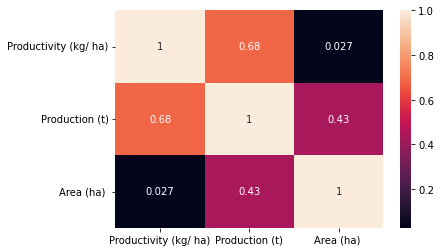

In [ ]:
correlation_matrix_by_region("11")

We made a function where the **user** can **explore by region**, choosing their code. After this, the **correlation matrix for productivity, production and area** is returned.
In this case, we show the correlation matrix for the North region (code 11).  As we know, the correlation matrix is a **symmetric matrix**. For this region, we see that area has a positive but very weak correlation with productivity (2.7%). Production and productivity, on the other hand, have a fairly strong correlation (68%): the higher the production, the higher the productivity as well. Finally, we also have a positive correlation between area and production (43%).

## Correlation Matrix between Energy spent on Agriculture, Productivity (Kg/ha), Production(t)
[[ go back to the top ]](#Table-of-contents)  

<AxesSubplot:>

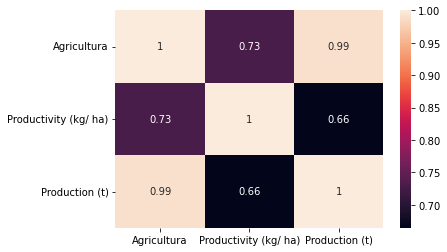

In [ ]:
energy_agricultura_mean = energy.groupby('Region')['Agricultura'].mean().to_frame() 
productivity_meanby_region = agriculture.groupby('Region',)['Productivity (kg/ ha)'].mean().to_frame()
production_meanby_region = agriculture.groupby('Region',)['Production (t)'].mean().to_frame()


# Test whether the energy spent for Agriculture is related to Productivity and Production

corr_agri_productivity_production = pd.concat([energy_agricultura_mean,productivity_meanby_region,production_meanby_region],axis=1)
sns.heatmap(corr_agri_productivity_production.corr(), annot=True)

We got the mean of the **electricity consumption (kWh)** on **agriculture** by **region**. The mean of **productivity** and **production** by **region** was also discovered. After this, the **correlation matrix between electricity spent on agriculture, productivity (Kg/ha), production (t)** is returned. The electricity spent on agriculture is given, on the heatmap, by the name "Agricultura". As we know, the correlation matrix is a **symmetric matrix**. We take from this matrix that the electricity spent on agriculture and the production have a correlation of almost 100%. We also have a fairly strong correlation between electricity consumption on agriculture  and productivity (73%).

## Correlation Matrix between production, produtivity, tmin (average), tmax (average) and prec (average) by year 
[[ go back to the top ]](#Table-of-contents) 

<AxesSubplot:>

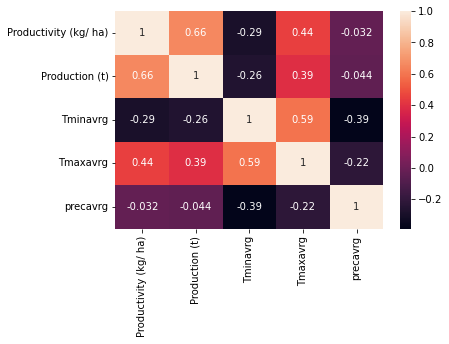

In [ ]:
# Let's average the production and productivity per year and see what correlation they have with ipmadata 
agriculture_meanby_year = agriculture.groupby(['years'])['Productivity (kg/ ha)','Production (t)'].mean()

# Average by years of tmax, tmin and prec
meteriologia_years = ipmadata.groupby(['years'])['Tminavrg','Tmaxavrg','precavrg'].mean()

corr_meterio_productivity_production = pd.concat([agriculture_meanby_year,meteriologia_years],axis=1)
sns.heatmap(corr_meterio_productivity_production.corr(), annot=True)

We got the mean of **production** and **productivity** of **every year**. And the same for **meteorology 
measurements**. After this, we obtained the **correlation matrix between production, productivity, tmin (average), tmax (average) and prec (average) by year**.  

What we want to see here is mainly the correlation between tmin, tmax and prec with productions and productivity. The average min temperature has a negative correlation with production and productivivty, of 26% and 29%, respectively. The average maximum temperature has a relatively strong correlation with productivity, 44%, and 39% with production. Contrary to what we expected, the correlation of precipitation with productivity and production is negligible.

## TOP Product with more Production by region
[[ go back to the top ]](#Table-of-contents) 

In [ ]:
agriculture1 = agriculture.rename_axis(['Region','years', 'products']) 
production_sum_products = agriculture1.groupby(['Region','products'])['Production (t)'].sum().to_frame()
top = production_sum_products.groupby('Region')['Production (t)'].nlargest(1).to_frame() # select Production
top=top.reset_index(level=2) # transform products index into column

top

,,products,Production (t)
Region,Region,,
1,1,Principais culturas forrageiras,49999109.0
11,11,Principais culturas forrageiras,22659587.0
15,15,Citrinos,7607623.0
16,16,Batata,13856393.0
17,17,Principais culturas para indústria,6952432.0
18,18,Principais culturas para indústria,34919019.0
20,20,Milho forrageiro,3987451.0
3,3,Batata,1323408.0
PT,PT,Principais culturas forrageiras,54012370.0


In [ ]:
def product (product,region):
    
    production_function= {}
    production_function = agriculture.loc[[region]] # locking a region
    production_function= production_function.swaplevel(0,-1).loc[[product]]  # selecting data for product 

    production_function = production_function.groupby(['years']).sum() # we will group by year
    production_function = production_function[["Production (t)"]]
    
    
    return production_function

In [ ]:
def topproducts_linechart (region):
    
    # Assign line number of the dataset to each region
    x=[]
    if region == '1':
        x=0
    elif region == '11':
        x=1
    elif region == '15':
        x=2
    elif region == '16':
        x=3
    elif region == '17':
        x=4
    elif region == '18':
        x=5
    elif region == '20':
        x=6
    elif region == '3':
        x=7
    elif region == 'PT':
        x=8
   
    z = len(product( str(top.iat[x,0]),region).index) # axis length
    fig, ax = plt.subplots(figsize=(z, z))
    df = product( str(top.iat[x,0]),region) # get the top region product by production
    yearslist = df.index.values.tolist() # list of the years
    plt.xlabel("Year") # x-axis label
    plt.ylabel("Production (t)") #y-axis label
    plt.title("Top product production evolution through the years in" + " "+ str(region))  # tittle

    return ax.plot(yearslist, product(str(top.iat[0,0]),region)['Production (t)'].values)

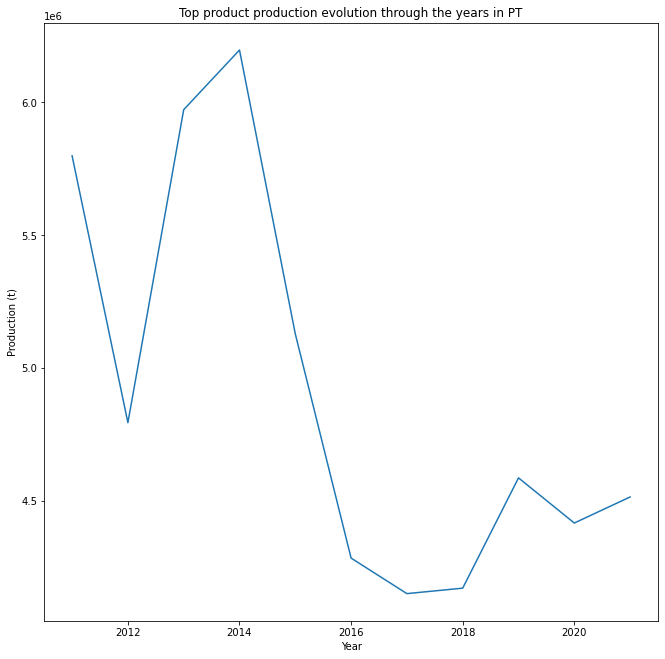

In [ ]:
topproducts_linechart ('PT')

We decided to see how the **most produced product** from a certain **region** behaved over time. We give the user the chance to explore the region he is interested by selecting, in the last function, the region code. 

The variable "top" returns a dataframe with **the most produced products for each region**. We also created another function that returns the **production for each year** of the chosen product in the desired region.
To conclude, using the two previous functions, we explored another one that shows us the desired **line chart**.

***

For the visualizations that follow we use as reference the agricultural statistics made by INE referring to the years [2021](https://www.ine.pt/xportal/xmain?xpid=INE&xpgid=ine_publicacoes&PUBLICACOESpub_boui=31589846&PUBLICACOESmodo=2), [2013](https://www.ine.pt/xportal/xmain?xpid=INE&xpgid=ine_publicacoes&PUBLICACOESpub_boui=129211&PUBLICACOESmodo=2) and [2004](https://www.ine.pt/xportal/xmain?xpid=INE&xpgid=ine_publicacoes&PUBLICACOESpub_boui=129211&PUBLICACOESmodo=2), so that we can understand certain phenomena that explain our visualizations.

## Precipitation mean through the years - bar chart
[[ go back to the top ]](#Table-of-contents)  

We will explore the **evolution of average annual precipitation from 1986 to 2020**, since the "ipmadata" dataset only gives us information up to 2020. In **blue** we present the evolution for the regions **north of the Tejo river** and, in orange, the regions **south of the Tejo river**.  
  
For the regions north of the Tejo river we consider: "North", with region code 11, "Center", with region code 16 and "Lisbon Metropolitan Area", with region code 17. 
  
For the regions south of the Tejo we consider: "Alentejo", with region code 18 and "Algarve", with region code 15.
  
  
Thus, in this visualization the regions: "PT", "Continente", "Região Autónoma dos Açores" and "Região Autónoma da Madeira" are not considered. 
  
We then made a function where the **user can choose the year he wants to get information about** and we show some examples of how it can be applied, as well as conclusions that could be drawn from the exploration.

In [ ]:
def precipitation_mean (year): # insert year as input (int)
    
    X = ['Jan-'+ str(year),'Feb-'+str(year),'Mar-'+str(year), 'Apr-'+str(year), 'May-'+str(year), 
         'Jun-'+str(year), 'Jul-'+str(year), 'Aug-'+str(year), 'Sep-'+str(year), 'Oct-'+str(year),
         'Nov-'+str(year), 'Dec-'+str(year)]

    X_axis = np.arange(len(X)) # set months of the respective year as the x-axis
    
    # Define the blue bars (north of the Tejo river)
    Ynorth = ipmadata.swaplevel(0,-1).loc[year].loc[['11','16','17']] # loc the year the user chooses and regions on north of the Tejo river
    Ynorth = Ynorth.loc[:, 'prec Apr':'prec Sep'] # loc precipitation for every month of the year from the ipmadata dataset
    Ynorth = pd.DataFrame({'prec Jan':Ynorth['prec Jan'],'prec Feb':Ynorth['prec Feb'],'prec Mar':Ynorth['prec Mar'],
                      'prec Apr':Ynorth['prec Apr'], 'prec May':Ynorth['prec May'], 'prec Jun':Ynorth['prec Jun'],
                      'prec Jul':Ynorth['prec Jul'], 'prec Aug':Ynorth['prec Aug'], 'prec Sep':Ynorth['prec Sep'],
                      'prec Oct':Ynorth['prec Oct'], 'prec Nov':Ynorth['prec Nov'], 'prec Dec':Ynorth['prec Dec']}) # monthly order (since it was in alphabetic order before)

    # Define the orange bars (south of the Tejo river)    
    Zsouth = ipmadata.swaplevel(0,-1).loc[year].loc[['18','15']]  # loc the year the user chooses and regions on south of the Tejo river
    Zsouth = Zsouth.loc[:, 'prec Apr':'prec Sep'] 
    Zsouth = pd.DataFrame({'prec Jan':Zsouth['prec Jan'],'prec Feb':Zsouth['prec Feb'],'prec Mar':Zsouth['prec Mar'],
                      'prec Apr':Zsouth['prec Apr'], 'prec May':Zsouth['prec May'], 'prec Jun':Zsouth['prec Jun'],
                      'prec Jul':Zsouth['prec Jul'], 'prec Aug':Zsouth['prec Aug'], 'prec Sep':Zsouth['prec Sep'],
                      'prec Oct':Zsouth['prec Oct'], 'prec Nov':Zsouth['prec Nov'], 'prec Dec':Zsouth['prec Dec']})


    # Plot the two types of bars deviated from each other by 0.2 so that they don't overlap
    # Compute the mean of the regions
    plt.bar(X_axis - 0.2, Ynorth.mean(), 0.4, label = 'Precicipation mean (North of Tejo)')
    plt.bar(X_axis + 0.2, Zsouth.mean(), 0.4, label = 'Precicipation mean (South of Tejo)')

    # Format characteristics
    plt.xticks(X_axis, X, rotation='vertical') # set the month names of the x-axis vertically
    plt.xlabel("Months of the Year") # x-axis label
    plt.ylabel("Precipitation (mm)") #y-axis label
    plt.title("Precipitation - Crop year" + ' ' +str(year)) # tittle
    plt.legend()
    plt.show()

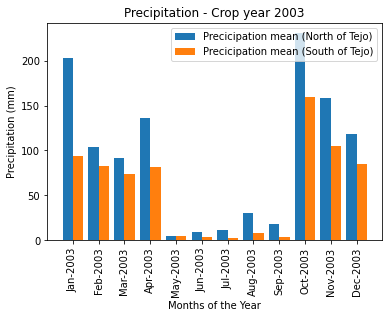

In [ ]:
precipitation_mean (2003)

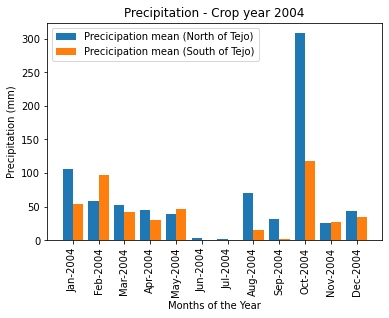

In [ ]:
precipitation_mean (2004)

If we try to apply the visualization for years equal to or greater than 2019 we can see that we only get information about the average rainfall for the region north of the Tejo. This is because in the ipmadata dataset itself we don't have rainfall information for those regions in those years. 

According to the agricultural statistics of the 2003/04 agricultural year from INE, the heavy rainfall at the end of November and beginning of December is confirmed. To this is added the heavy rainfall in the month of October. According to these, the occurrence led to the interruption of the autumn-winter sowing works. The improvement of weather conditions allowed the completion of the sowing of cereal crops (such as oats and wheat, for example).

We also verified the beginning of a dry summer. However, unusually heavy rainfall was recorded in August for the season, which did not, however, have negative repercussions on agriculture.

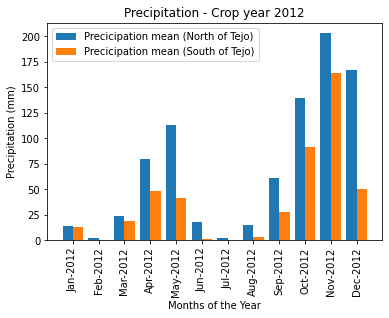

In [ ]:
precipitation_mean (2012)

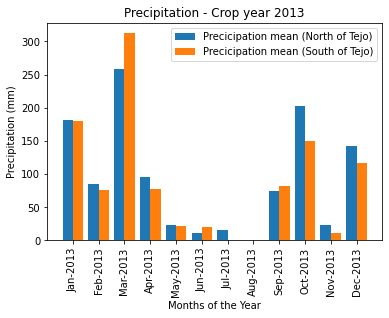

In [ ]:
precipitation_mean (2013)

This year, crop year 2012/2013, was marked by tornadoes (Barlavento Algarvio, November 16, 2012) and storms with exceptionally heavy rainfall and winds (the whole territory, January 19, 2013), which caused high losses on many farms.

There were very high precipitation values, and the beginning of spring was very rainy. It was the second wettest March in mainland Portugal in the last 50 years, to date. This situation conditioned the soil preparation works and the sowing/planting of spring-summer crops, as well as the development of the crops installed. On the other hand, it allowed irrigation needs to be met. 

The summer was dry, but promoting the normal development of crops.  

## Temperature mean through the years - bar chart
[[ go back to the top ]](#Table-of-contents)  

Here we do the same thing we did for precipitation but this time for **temperature**. That is, we explore the evolution of the annual average temperature (and we do the average of the maximum and minimum temperatures). Again the data for the visualization is taken from the dataset "ipmadata" and the regions are distributed in the same way as in the previous visualization.
Again, we made a function where the **user can choose the year** he wants to collect information about and we show some examples.

In [ ]:
def temperature_mean (year): # insert year as input (int)
    
    X = ['Jan-'+ str(year),'Feb-'+str(year),'Mar-'+str(year), 'Apr-'+str(year), 'May-'+str(year), 
         'Jun-'+str(year), 'Jul-'+str(year), 'Aug-'+str(year), 'Sep-'+str(year), 'Oct-'+str(year),
         'Nov-'+str(year), 'Dec-'+str(year)]

    X_axis = np.arange(len(X)) # set months of the respective year as the x-axis
    
    # Define the blue bars (north of the Tejo river)
    Ynorth = ipmadata.swaplevel(0,-1).loc[year].loc[['11','16','17']] # loc the year the user chooses and regions on north of the Tejo river
    Ynorth = Ynorth.loc[:, 'tmax Apr':'tmin Sep'] # loc maximum and minimum temperatures for every month of the year from the ipmadata dataset
    month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] # list of months in monthly order
    for i in month: 
        col = Ynorth.loc[: , ["tmax "+i, "tmin "+i]] 
        Ynorth['tmax_min '+i] = col.mean(axis=1) # mean of maximum and minimum temperatures for every month
    Ynorth = Ynorth.loc[:, 'tmax_min Jan':'tmax_min Dec'] #loc the means of tmin and tmax in monthly order

    # Define the orange bars (south of the Tejo river) 
    Zsouth = ipmadata.swaplevel(0,-1).loc[year].loc[['18','15']] # loc the year the user chooses and regions on south of the Tejo river
    Zsouth = Zsouth.loc[:, 'tmax Apr':'tmin Sep'] # loc maximum and minimum temperatures for every month of the year from the ipmadata dataset
    month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] # list of months in monthly order
    for i in month: 
        col = Zsouth.loc[: , ["tmax "+i, "tmin "+i]]
        Zsouth['tmax_min '+i] = col.mean(axis=1) # mean of maximum and minimum temperatures for every month
    Zsouth = Zsouth.loc[:, 'tmax_min Jan':'tmax_min Dec'] # loc the means of tmin and tmax in monthly order
        
    # Plot the two types of bars deviated from each other by 0.2 so that they don't overlap
    # Compute the mean of the regions
    plt.bar(X_axis - 0.2, Ynorth.mean(), 0.4, label = 'Temperature mean (North of Tejo)')
    plt.bar(X_axis + 0.2, Zsouth.mean(), 0.4, label = 'Temperature mean (South of Tejo)')

    # Format characteristics
    plt.xticks(X_axis, X, rotation='vertical')
    plt.xlabel("Months of the Year")
    plt.ylabel("Temperature mean (ºC)")
    plt.title("Temperaure mean - Crop year" + ' ' +str(year))
    plt.legend()
    plt.show()

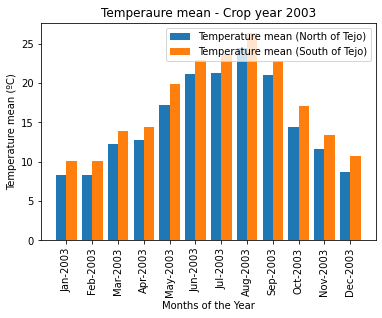

In [ ]:
temperature_mean (2003)

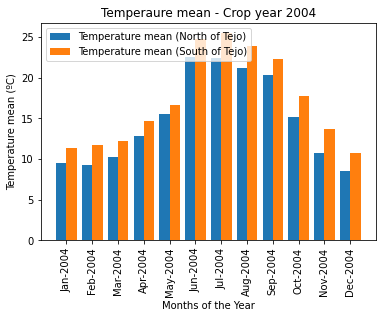

In [ ]:
temperature_mean (2004)

Besides the drought, for this agricultural year, there was a very hot summer, as can be seen in the months of June and July, mainly, where the average maximum and minimum temperature reaches around 25ºC.

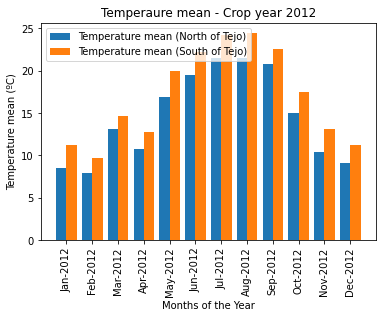

In [ ]:
temperature_mean (2012)

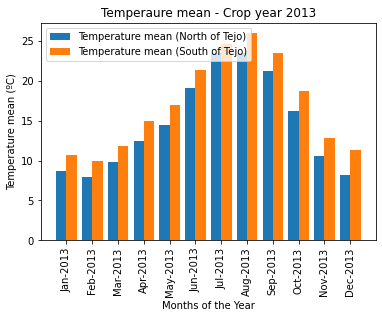

In [ ]:
temperature_mean (2013)

Again, for this agricultural year, besides having a hot summer, we also had a very dry summer. The heat waves recorded in June, July (more extensive in territorial terms) and August, occasionally damaged some crops, particularly those in full bloom / fruit-vegetation, according to agricultural statistics given by INE and confirmed by our visualization.

## Autumn and Winter Cereals - Area vs Production linecharts
[[ go back to the top ]](#Table-of-contents)  

For this visualization we are going to use the "**Area(ha)**" and "**Prodution(t)**" columns from the "**agriculture**" dataset.

As we can see from the title the products we will explore the autumn and winter cereals. The cereals present in the "agriculture" dataset are:  "Arroz, Aveia, Aveia forrageira, Centeio, Cereais para grão, Cevada, Milho, Milho forrageiro, Milho regadio, Milho sequeiro , Trigo, Trigo duro, Trigo mole and Triticale".
As autumn and winter cereals, we will use: "Aveia, Aveia forrageira, Centeio, Cevada, Cereais para grão, Trigo, Trigo duro, Trigo mole and Triticale".  
  
  
As we are going to make more **comparisons** of this kind, that is, **between area and production** of a given product, we have created a function that allows the **user to choose** the **region** that he wants to analyze.

In [ ]:
def areavsproduction_per_region_autmwint_cereals(region_code): # insert region as input (int) or string if we use the region 'PT'

    production_area = agriculture.loc[[str(region_code)]] # loc a region
    production_area = production_area.swaplevel(0,-1).loc[['Aveia', 'Aveia forrageira', 'Centeio', 'Cevada', 'Trigo',
                              'Trigo duro', 'Trigo mole', 'Triticale', 'Cereais para grão']] # selecting each cereal we considered for this season
    production_area = production_area.groupby(['years']).sum() # we will use the sum of production and area for the whole group "autumn/winter cereals"
    production_area = production_area[["Production (t)", "Area (ha) "]]
    yearslist = production_area.index.values.tolist() # list of the years (from 1986 to 2021)
    area = production_area["Area (ha) "] # selecting the "Area (ha)" column
    production = production_area["Production (t)"] # selecting the "Production (t)" columns


    # Create figure and axis objects with subplots()
    fig,ax = plt.subplots()
    
    # Make a plot
    ax.plot(yearslist,
            area,
            color = "red", 
            marker = "o")
    
    # Set x-axis label
    ax.set_xlabel("Year", fontsize = 12)
    
    # Set y-axis label
    ax.set_ylabel("Area (ha)",
                  color = "red",
                  fontsize = 12)

    # Twin object for two different y-axis on the sample plot
    ax2 = ax.twinx()
    
    # Make a plot with different y-axis using second axis object
    ax2.plot(yearslist, production,color = "blue",marker = "o")
    ax2.set_ylabel("Production (t)",color = "blue",fontsize = 12)
    plt.show()

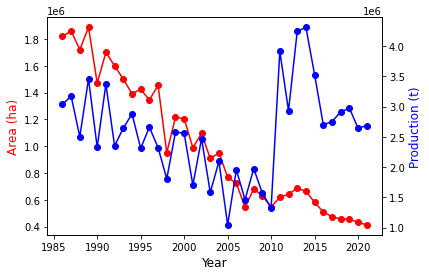

In [ ]:
areavsproduction_per_region_autmwint_cereals('PT')

The usual periods of rainfall at this time of year, hinder the sowing of autumn/winter cereals, with the interruption of these operations when conditions were not agronomically acceptable (waterlogged soils). 
A large part of the winter cereal harvest was finished by the end of July, thus registering decreases in all winter cereals, with the exception of durum wheat, whose significant increase in area led to an increase in production.
We can also see a decrease in area and production, compared to previous years, until approximately 2010. However, starting in 2010 there is a sharp increase in production accompanied by a brief increase in area as well. In this case we see a greater difference between area and production.

## Spring and Summer Cereals - Area vs Production linecharts
[[ go back to the top ]](#Table-of-contents)  

We do the same comparison as the previous visualization but, in this case, for spring/summer cereals. As spring/summer cereals we consider: "Arroz, Milho, Milho forrageiro, Milho regadio, Milho sequeiro".
We will do two separate visualizations, one for "Arroz" and one for "Milho". In the case of "Milho" we consider all types of it (we make a sum of them):  "Milho, Milho forrageiro, Milho regadio, Milho sequeiro".  
Again, we have created a function that allows the user to choose, the region that they want to analyze.

### Area and production of corn (all types of corn) ("Milho")

In [ ]:
def areavsproduction_per_region_corn(region_code): # insert region as input (int) or string if we use the region 'PT'

    production_area = agriculture.loc[[str(region_code)]] # loc a region

    production_area = production_area.swaplevel(0,-1).loc[['Milho', 'Milho forrageiro', 'Milho regadio',
                                                           'Milho sequeiro']] # selecting data for all kinds of corn production
    production_area = production_area.groupby(['years']).sum() # sum of production and area for the whole group of corn
    production_area = production_area[["Production (t)", "Area (ha) "]]
    yearslist = production_area.index.values.tolist() # list of the years (from 1986 to 2021)
    area = production_area["Area (ha) "]  # selecting the "Area (ha)" column
    production = production_area["Production (t)"] # selecting the "Production (t)" columns

    
    # Create figure and axis objects with subplots()
    fig,ax = plt.subplots()
    
    # Make a plot
    ax.plot(yearslist,
            area,
            color="red", 
            marker="o")
    
    # Set x-axis label
    ax.set_xlabel("Year", fontsize = 12)
    
    # Set y-axis label
    ax.set_ylabel("Area (ha)",
                  color="red",
                  fontsize=12)

    # Twin object for two different y-axis on the sample plot
    ax2=ax.twinx()
    
    # Make a plot with different y-axis using second axis object
    ax2.plot(yearslist, production,color="blue",marker="o")
    ax2.set_ylabel("Production (t)",color="blue",fontsize=12)
    plt.show()

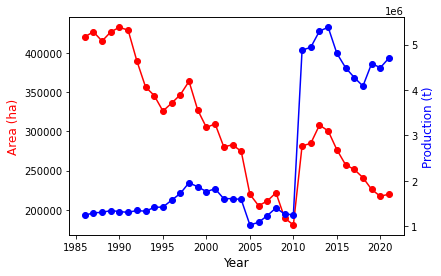

In [ ]:
areavsproduction_per_region_corn('PT')

Until 1995 we see an "odd" relationship between area and production: area, in general, decreases, yet production increases. For the following years we verify an approximate evolution between area and production. 
Again, we see a very sharp increase in 2010, as we saw for autumn and winter cereals. Therefore, we can assume that from 2010 onwards there was a high production of cereals, in general.

### Area and production of rice ("Arroz")

In [ ]:
def areavsproduction_per_region_rice(region_code): # insert region as input (int) or string if we use the region 'PT'

    production_area = agriculture.loc[[str(region_code)]] #loc a region
    production_area = production_area.swaplevel(0,-1).loc[['Arroz']] # selecting only the rice production and area
    production_area = production_area.groupby(['years']).sum() # we will group by years
    production_area = production_area[["Production (t)", "Area (ha) "]] 
    yearslist = production_area.index.values.tolist() # list of the years (from 1986 to 2021)
    area = production_area["Area (ha) "] # selecting the "Area (ha)" column
    production = production_area["Production (t)"] # selecting the "Production (t)" columns

    # Create figure and axis objects with subplots()
    fig,ax = plt.subplots()
    
    # Make a plot
    ax.plot(yearslist,
            area,
            color="red", 
            marker="o")
    
    # Set x-axis label
    ax.set_xlabel("Year", fontsize = 12)
    
    # Set y-axis label
    ax.set_ylabel("Area (ha)",
                  color="red",
                  fontsize=12)

    # Twin object for two different y-axis on the sample plot
    ax2=ax.twinx()
    
    # Make a plot with different y-axis using second axis object
    ax2.plot(yearslist, production,color="blue",marker="o")
    ax2.set_ylabel("Production (t)",color="blue",fontsize=12)
    plt.show()

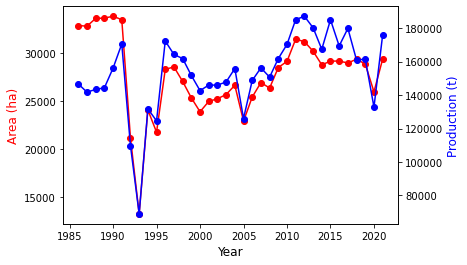

In [ ]:
areavsproduction_per_region_rice('PT')

We can see that area generally follows production. They are highly correlated for this product and this region. The decrease in production is due to the decrease in cultivation area and also due to the lack of light and heat during the summer, the uncontrolled emergence of pyriculariosis 1 and the high degree of infestation of the fields by millet, for example.

## Area and production of tomatoes for industry - Area vs Production linecharts
[[ go back to the top ]](#Table-of-contents) 

Let's now compare the area and production of tomatoes for industry. Again, we have created a function that allows the user to choose, the region that they want to analyze.

In [ ]:
def areavsproduction_per_region_tomatoesforindustry(region_code): # insert region as input (int) or string if we use the region 'PT'

    production_area = agriculture.loc[[str(region_code)]] # loc a region
    production_area = production_area.swaplevel(0,-1).loc[['Tomate para indústria']] # selecting only the production and area of tomatoes for industry 
    production_area = production_area.groupby(['years']).sum() # group by year
    production_area = production_area[["Production (t)", "Area (ha) "]]
    yearslist = production_area.index.values.tolist() # list of the years (from 1986 to 2021)
    area = production_area["Area (ha) "]  # selecting the "Area (ha)" column
    production = production_area["Production (t)"] # selecting the "Production (t)" columns

    # Create figure and axis objects with subplots()
    fig,ax = plt.subplots()
    
    # Make a plot
    ax.plot(yearslist,
            area,
            color="red", 
            marker="o")
    
    # Set x-axis label
    ax.set_xlabel("Year", fontsize = 12)
    
    # Set y-axis label
    ax.set_ylabel("Area (ha)",
                  color="red",
                  fontsize=12)

    # Twin object for two different y-axis on the sample plot
    ax2=ax.twinx()
    
    # Make a plot with different y-axis using second axis object
    ax2.plot(yearslist, production,color="blue",marker="o")
    ax2.set_ylabel("Production (t)",color="blue",fontsize=12)
    plt.show()

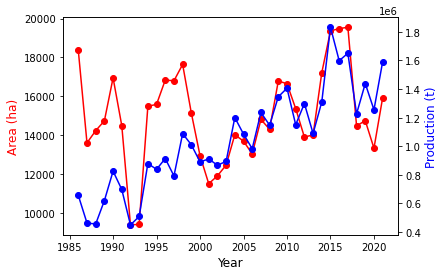

In [ ]:
areavsproduction_per_region_tomatoesforindustry('PT')

From 2000 on, approximately, we can see that the area follows, once again, the production, very closely. We have seen, from that year on, a constant evolution in production and, consequently, in the area under cultivation.

## Area and production of potatoes - Area vs Production linecharts
[[ go back to the top ]](#Table-of-contents) 

Let's now compare the area and production of potatoes. Again, we have created a function that allows the user to choose, the region that they want to analyze.

In [ ]:
def areavsproduction_per_region_potatoes(region_code): # insert region as input (int) or string if we use the region 'PT'

    production_area = agriculture.loc[[str(region_code)]] # locking a region
    production_area = production_area.swaplevel(0,-1).loc[['Batata']] # selecting only the production and area of potato
    production_area = production_area.groupby(['years']).sum() # group by years
    production_area = production_area[["Production (t)", "Area (ha) "]]
    yearslist = production_area.index.values.tolist() 
    area = production_area["Area (ha) "] # selecting the "Area (ha)" column
    production = production_area["Production (t)"] # selecting the "Production (t)" columns

    # Create figure and axis objects with subplots()
    fig,ax = plt.subplots()
    
    # Make a plot
    ax.plot(yearslist,
            area,
            color="red", 
            marker="o")
    
    # Set x-axis label
    ax.set_xlabel("Year", fontsize = 12)
    
    # Set y-axis label
    ax.set_ylabel("Area (ha)",
                  color="red",
                  fontsize=12)

    # Twin object for two different y-axis on the sample plot
    ax2=ax.twinx()
    
    # Make a plot with different y-axis using second axis object
    ax2.plot(yearslist, production,color="blue",marker="o")
    ax2.set_ylabel("Production (t)",color="blue",fontsize=12)
    plt.show()

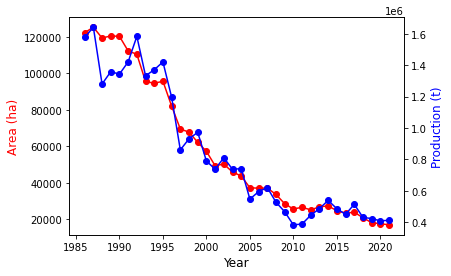

In [ ]:
areavsproduction_per_region_potatoes('PT')

We can see a general decrease in both production and area from 1986 to 2021. Again, we see that production and area are highly correlated, for this product and this region.

## Fresh fruit, subtropical fruits and citrus - Area vs Production linecharts
[[ go back to the top ]](#Table-of-contents) 

Let's now look at the production and cultivation area for fresh fruit, subtropical fruits and citrus. We do the exploration, individually, for apple, pear, peach, cherry and orange.

### Area and apple production 

In [ ]:
def areavsproduction_per_region_apple(region_code): # insert region as input (int) or string if we use the region 'PT'

    production_area = agriculture.loc[[str(region_code)]] # loc a region
    production_area = production_area.swaplevel(0,-1).loc[['Maçã']] # selecting only the production and area of apple
    production_area = production_area.groupby(['years']).sum() # group by year
    production_area = production_area[["Production (t)", "Area (ha) "]]
    yearslist = production_area.index.values.tolist() 
    area = production_area["Area (ha) "] # selecting the "Area (ha)" column
    production = production_area["Production (t)"] # selecting the "Production (t)" columns

    # Create figure and axis objects with subplots()
    fig,ax = plt.subplots()
    
    # Make a plot
    ax.plot(yearslist,
            area,
            color="red", 
            marker="o")
    
    # Set x-axis label
    ax.set_xlabel("Year", fontsize = 12)
    
    # Set y-axis label
    ax.set_ylabel("Area (ha)",
                  color="red",
                  fontsize=12)

    # Twin object for two different y-axis on the sample plot
    ax2=ax.twinx()
    
    # Make a plot with different y-axis using second axis object
    ax2.plot(yearslist, production,color="blue",marker="o")
    ax2.set_ylabel("Production (t)",color="blue",fontsize=12)
    plt.show() 

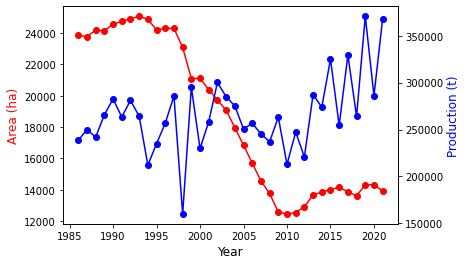

In [ ]:
areavsproduction_per_region_apple('PT')

We can see that there is practically no correlation between area and production for this product and this region.
We can see a sharp decrease in the area of cultivation between 1997 and 2010, approximately. However, in general, there is an increase in apple production over the years.

### Area and pear production

In [ ]:
def areavsproduction_per_region_pear(region_code): # insert region as input (int) or string if we use the region 'PT'

    production_area = agriculture.loc[[str(region_code)]] # loc a region
    production_area = production_area.swaplevel(0,-1).loc[['Pêra']] # selecting only the production and area of pear
    production_area = production_area.groupby(['years']).sum() # group by year
    production_area = production_area[["Production (t)", "Area (ha) "]] 
    yearslist = production_area.index.values.tolist() # list of the years (from 1986 to 2021)
    area = production_area["Area (ha) "] # selecting the "Area (ha)" column
    production = production_area["Production (t)"] # selecting the "Production (t)" columns

    # Create figure and axis objects with subplots()
    fig,ax = plt.subplots()
    
    # Make a plot
    ax.plot(yearslist,
            area,
            color="red", 
            marker="o")
    
    # Set x-axis label
    ax.set_xlabel("Year", fontsize = 12)
    
    # Set y-axis label
    ax.set_ylabel("Area (ha)",
                  color="red",
                  fontsize=12)

    # Twin object for two different y-axis on the sample plot
    ax2=ax.twinx()
    
    # Make a plot with different y-axis using second axis object
    ax2.plot(yearslist, production,color="blue",marker="o")
    ax2.set_ylabel("Production (t)",color="blue",fontsize=12)
    plt.show()

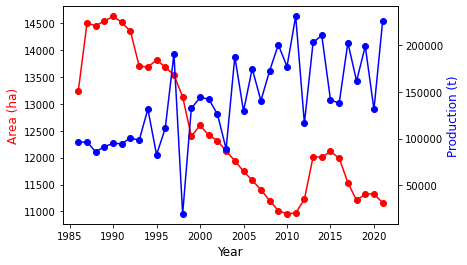

In [ ]:
areavsproduction_per_region_pear('PT')

Again, we can see that there is practically no correlation between area and production for this product and this region. However, over the years we see, in general, an increase in production of pears and a decrease in the area under cultivation.

### Area and peach production 


In [ ]:
def areavsproduction_per_region_peach(region_code): # insert region as input (int) or string if we use the region 'PT'

    production_area = agriculture.loc[[str(region_code)]] # loc a region
    production_area = production_area.swaplevel(0,-1).loc[['Pêssego']]  # selecting only the production and area of peach
    production_area = production_area.groupby(['years']).sum() # group by year
    production_area = production_area[["Production (t)", "Area (ha) "]]
    yearslist = production_area.index.values.tolist() # list of the years (from 1986 to 2021)
    area = production_area["Area (ha) "]  # selecting the "Area (ha)" column
    production = production_area["Production (t)"]  # selecting the "Production (t)" column

    # Create figure and axis objects with subplots()
    fig,ax = plt.subplots()
    
    # Make a plot
    ax.plot(yearslist,
            area,
            color="red", 
            marker="o")
    # Set x-axis label
    
    ax.set_xlabel("Year", fontsize = 12)
    # Set y-axis label
    
    ax.set_ylabel("Area (ha)",
                  color="red",
                  fontsize=12)

    # Twin object for two different y-axis on the sample plot
    ax2=ax.twinx()
    
    # make a plot with different y-axis using second axis object
    ax2.plot(yearslist, production,color="blue",marker="o")
    ax2.set_ylabel("Production (t)",color="blue",fontsize=12)
    plt.show()

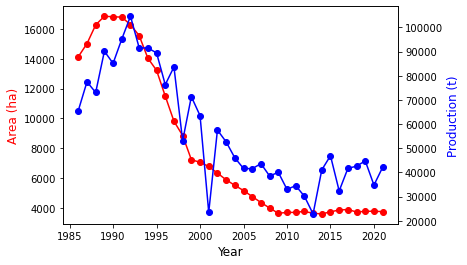

In [ ]:
areavsproduction_per_region_peach('PT')

Here we already see a certain relationship between the evolution of production and the area under cultivation. In general, there is a large decrease in peach production and area over the years. 

### Area and cherry production

In [ ]:
def areavsproduction_per_region_cherry(region_code):  # insert region as input (int) or string if we use the region 'PT'

    production_area = agriculture.loc[[str(region_code)]] # loc a region
    production_area = production_area.swaplevel(0,-1).loc[['Cereja']] # selecting only the production and area of cherry
    production_area = production_area.groupby(['years']).sum() # group by year
    production_area = production_area[["Production (t)", "Area (ha) "]]
    yearslist = production_area.index.values.tolist() # list of the years (from 1986 to 2021)
    area = production_area["Area (ha) "]  # selecting the "Area (ha)" column
    production = production_area["Production (t)"] # selecting the "Production (t)" column

    # Create figure and axis objects with subplots()
    fig,ax = plt.subplots()
    
    # Make a plot
    ax.plot(yearslist,
            area,
            color="red", 
            marker="o")
    
    # Set x-axis label
    ax.set_xlabel("Year", fontsize = 12)
    
    # Set y-axis label
    ax.set_ylabel("Area (ha)",
                  color="red",
                  fontsize=12)

    # Twin object for two different y-axis on the sample plot
    ax2=ax.twinx()
    
    # Make a plot with different y-axis using second axis object
    ax2.plot(yearslist, production,color="blue",marker="o")
    ax2.set_ylabel("Production (t)",color="blue",fontsize=12)
    plt.show()

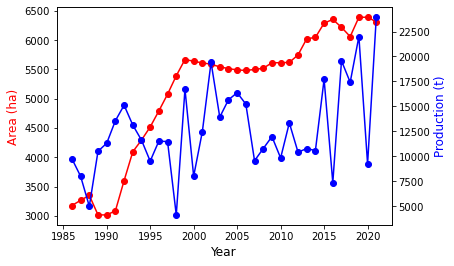

In [ ]:
areavsproduction_per_region_cherry('PT')

We can see that the cherry growing area grew tremendously from about 1990 on, and has been growing ever since, generally speaking. The production has had a slight increase over previous years.

### Area and orange production

In [ ]:
def areavsproduction_per_region_orange(region_code): # insert region as input (int) or string if we use the region 'PT'

    production_area = agriculture.loc[[str(region_code)]] # loc a region
    production_area = production_area.swaplevel(0,-1).loc[['Laranja']] # selecting only the production and area of orange
    production_area = production_area.groupby(['years']).sum() 
    production_area = production_area[["Production (t)", "Area (ha) "]]
    yearslist = production_area.index.values.tolist() # list of the years (from 1986 to 2021)
    area = production_area["Area (ha) "] # selecting the "Area (ha)" column
    production = production_area["Production (t)"] # selecting the "Production (t)" column
 
    # Create figure and axis objects with subplots()
    fig,ax = plt.subplots()
    
    # Make a plot
    ax.plot(yearslist,
            area,
            color="red", 
            marker="o")
    
    # Set x-axis label
    ax.set_xlabel("Year", fontsize = 12)
    
    # Set y-axis label
    ax.set_ylabel("Area (ha)",
                  color="red",
                  fontsize=12)

    # Twin object for two different y-axis on the sample plot
    ax2=ax.twinx()
    
    # Make a plot with different y-axis using second axis object
    ax2.plot(yearslist, production,color="blue",marker="o")
    ax2.set_ylabel("Production (t)",color="blue",fontsize=12)
    plt.show()

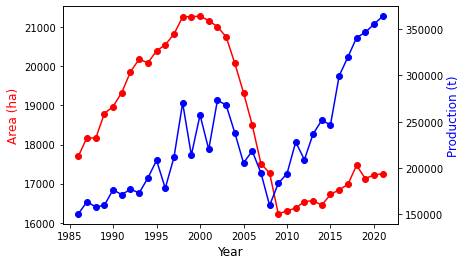

In [ ]:
areavsproduction_per_region_orange('PT')

We can verify that the evolution of the orange growing area had almost a negative quadratic form, we see an increase until around 2000 and then a sharp decrease until 2010, approximately. 
In general, we see an increase in production over the years, but there is a decrease between 2003 and 2008, approximately. The sustained upward trend in production since 2015 is confirmed.

## Ripe Nuts - Area vs Production linecharts
[[ go back to the top ]](#Table-of-contents) 

We will now explore the nuts by making, as before, the comparison between the area under cultivation and the production. To do this, we will explore almonds and chestnuts individually. 

### Area and almond production

In [ ]:
def areavsproduction_per_region_almond(region_code): # insert region as input (int) or string if we use the region 'PT'

    production_area = agriculture.loc[[str(region_code)]] #cloc a region
    production_area = production_area.swaplevel(0,-1).loc[['Amêndoa']] # selecting only the production and area of almond
    production_area = production_area.groupby(['years']).sum() # group by year
    production_area = production_area[["Production (t)", "Area (ha) "]]
    yearslist = production_area.index.values.tolist()  # list of the years (from 1986 to 2021)
    area = production_area["Area (ha) "] # selecting the "Area (ha)" column
    production = production_area["Production (t)"] # selecting the "Production (t)" column

    # Create figure and axis objects with subplots()
    fig,ax = plt.subplots()
    
    # Make a plot
    ax.plot(yearslist,
            area,
            color="red", 
            marker="o")
    
    # Set x-axis label
    ax.set_xlabel("Year", fontsize = 12)
    
    # Set y-axis label
    ax.set_ylabel("Area (ha)",
                  color="red",
                  fontsize=12)

    # Twin object for two different y-axis on the sample plot
    ax2=ax.twinx()
    
    # Make a plot with different y-axis using second axis object
    ax2.plot(yearslist, production,color="blue",marker="o")
    ax2.set_ylabel("Production (t)",color="blue",fontsize=12)
    plt.show()

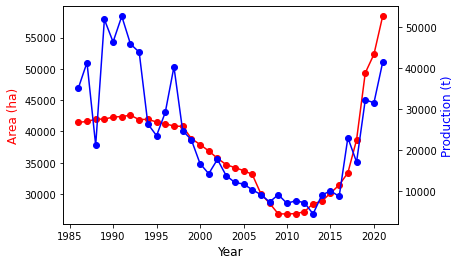

In [ ]:
areavsproduction_per_region_almond('PT')

We see a positive quadratic evolution of both production and area under cultivation.
After a systematic reduction of the almond area between 1994 and 2009, interest in this crop resurged, with the installation of new intensive orchards. From 2010, the almond area began a continuous process of increase, with reflection, necessarily delayed, in production (intensive almond orchards begin production between the second and third year after planting and reach full production in about seven years.

### Area and chestnut production

In [ ]:
def areavsproduction_per_region_chestnut(region_code): # insert region as input (int) or string if we use the region 'PT'

    production_area = agriculture.loc[[str(region_code)]] #loc a region
    production_area = production_area.swaplevel(0,-1).loc[['Castanha']] # selecting only the production and area of chestnut
    production_area = production_area.groupby(['years']).sum() #group by year
    production_area = production_area[["Production (t)", "Area (ha) "]]
    yearslist = production_area.index.values.tolist() 
    area = production_area["Area (ha) "]
    production = production_area["Production (t)"]

    # create figure and axis objects with subplots()
    fig,ax = plt.subplots()
    # make a plot
    ax.plot(yearslist,
            area,
            color="red", 
            marker="o")
    # set x-axis label
    ax.set_xlabel("Year", fontsize = 12)
    # set y-axis label
    ax.set_ylabel("Area (ha)",
                  color="red",
                  fontsize=12)

    # twin object for two different y-axis on the sample plot
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(yearslist, production,color="blue",marker="o")
    ax2.set_ylabel("Production (t)",color="blue",fontsize=12)
    plt.show()

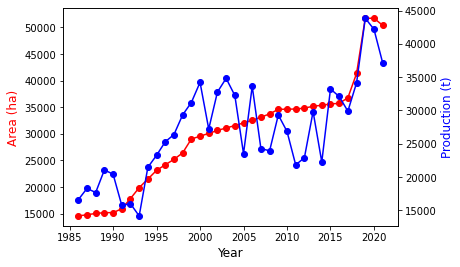

In [ ]:
areavsproduction_per_region_chestnut('PT')

The decreases in the chestnut production can be justified by the occurrence of several periods of rainfall and not very high average temperatures, enhancing the appearance and development of septoria, a disease caused by the fungus Mycosphaerella maculiformis, which usually has marginal occurrence and little economic impact.
The cultivation area has been growing over the years, in general, with a small decrease in the last 2 years. 

## Wine grape - Precipitation vs Production linecharts
[[ go back to the top ]](#Table-of-contents) 

It makes sense to make a comparison between wine grape production and precipitation during the months that the grapes start to bloom, i.e. precipitation from April to May (1986-2021), since precipitation has a strong influence at this stage. 

In [ ]:
def precipitationvsproduction_per_region(region_code): # insert region as input (int) or string if we use the region 'PT'

    agriculture_uvaparavinho_production = agriculture['Production (t)'] 
    agriculture_uvaparavinho_production = agriculture_uvaparavinho_production.loc[['11']] #loc region
    agriculture_uvaparavinho_production = agriculture_uvaparavinho_production.swaplevel(0,-1).loc[['Uva para vinho']] # selecting only the production wine grape
    agriculture_uvaparavinho_production = agriculture_uvaparavinho_production.groupby(['years']).sum() # group by year

    ipmadata_prec_abrilmaio = ipmadata.stack()
    ipmadata_prec_abrilmaio = ipmadata_prec_abrilmaio.loc[['11']] #loc region
    ipmadata_prec_abrilmaio = ipmadata_prec_abrilmaio.swaplevel(0,-1).loc[['prec Apr', 'prec May']]  # selecting only the April and May precipitation data
    ipmadata_prec_abrilmaio = ipmadata_prec_abrilmaio.groupby(['years']).sum() # group by year


    prec_production = pd.concat([agriculture_uvaparavinho_production , ipmadata_prec_abrilmaio],axis=1)
    prec_production.columns=['Production (t)', 'Precipitation (mm)']
    yearslist = prec_production.index.values.tolist()
    
    # create figure and axis objects with subplots()
    fig,ax = plt.subplots()
    # make a plot
    ax.plot(yearslist,
            prec_production['Production (t)'],
            color="red", 
            marker="o")
    # set x-axis label
    ax.set_xlabel("year", fontsize = 12)
    # set y-axis label
    ax.set_ylabel("Production (t)",
                  color="red",
                  fontsize=12)

    #twin object for two different y-axis on the sample plot
    ax2=ax.twinx()
    #make a plot with different y-axis using second axis object
    ax2.plot(yearslist,  prec_production['Precipitation (mm)'], color="blue", marker="o")
    ax2.set_ylabel("Precipitation (mm)",color="blue",fontsize=12)
    plt.show()
    #save the plot as a file
    fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
                format='jpeg',
                dpi=100,
                bbox_inches='tight')

    plt.show() 

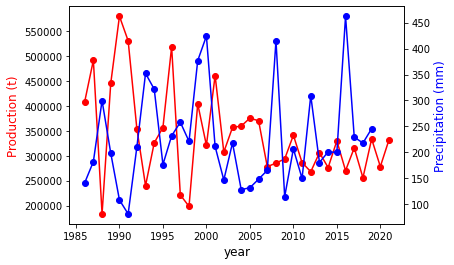

In [ ]:
precipitationvsproduction_per_region('PT')

Annual wine production in the last two decades has been stabilizing, in contrast to the large fluctuations in the early years, possibly related to the wet conditions in April and May (in years when the spring was dry, yields were generally higher).

## Olive oil - Production linechart
[[ go back to the top ]](#Table-of-contents) 

In this thread we will limit ourselves to exploring the evolution of olive oil production.

In [ ]:
 def production_per_region_olive(region_code): # insert region as input (int) or string if we use the region 'PT'

    production_olive = agriculture.loc[[str(region_code)]] #loc a region
    production_olive = production_olive.swaplevel(0,-1).loc[['Azeitona para azeite']]# selecting only the production of olive oil
    production_olive = production_olive.groupby(['years']).sum() # group by year
    yearslist = production_olive.index.values.tolist()
    production_olive = production_olive["Production (t)"]

    # create figure and axis objects with subplots()
    fig,ax = plt.subplots()
    # make a plot
    ax.plot(yearslist,
            production_olive,
            color="red", 
            marker="o")
    # set x-axis label
    ax.set_xlabel("Year", fontsize = 12)
    # set y-axis label
    ax.set_ylabel("Production (t)",
                  color="red",
                  fontsize=12)


    plt.show() 

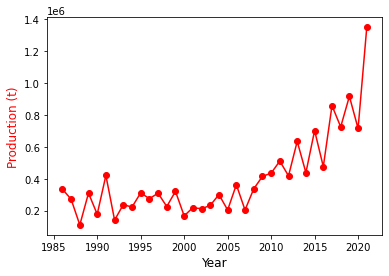

In [ ]:
production_per_region_olive('PT')

We can see, in general, an increase in olive production for olive oil. We mainly see a sharp increase from 2019 to now.  

***

# Assignment 3 - Machine Learning
[[ go back to the top ]](#Table-of-contents)

The main objective the third delivery was to try to implement machine learning models in order to try to predict something with the data available to us. 
We'll just use the dataset that we previously defined as "**agriculture**" and the dataset "**ipmadata**". From these, our goal is to find, for example, a product that makes sense to analyse in a certain region and try to predict its production from the ipmadata data, that is, from the precipitation, maximum temperature and minimum temperature values of the respective years. It would not make sense for us to predict something that was related to area, for example, and consequently it would also not make sense for us to predict productivity, as this is just the relationship between production and area. We decided to analyse: 
- banana production in Madeira;
- orange production in Algarve; 
- olive oil production in Alentejo;
- wine grapes in the North.  

In addition to this, in relation exclusively to the dataset "ipmadata", we made the prediction of precipitation for the year 2018. We decided on 2018 because it is the last year of which we actually have records in our dataset, which allows us to measure the accuracy of our models, comparing it with the real value.
To do so, we will use different machine learning models and make, afterwards, a comparison of them.  Among these are: 

- linear regression; 
- ridge regression; 
- lasso regression;
- decision tree regression. 

As we can see, we're trying to solve a **regression problem**.

## Algorithms
[[ go back to the top ]](#Table-of-contents) 

To evaluate the models we used the metric MASE. Mean absolute squared error (MASE) is a measure of the difference between the predicted values of a model and the true values. It is similar to mean squared error (MSE), but instead of squaring the differences between the predicted and true values, it takes the absolute value of the differences. MASE is often used in time series analysis, as it is more robust to the presence of outliers and can handle data with different scales and units.

MASE is calculated by taking the sum of the absolute differences between the predicted values and the true values, and then dividing by the number of data points. Mathematically, MASE can be expressed as:

MASE = 1/n * Σ|y - ŷ|

where n is the number of data points, y is the true value, and ŷ is the predicted value.

MASE is commonly used to evaluate the performance of a model when forecasting time series data. It is often preferred to MSE because it is less sensitive to the presence of outliers and can handle data with different scales and units more effectively. However, MASE is not differentiable, which can make it more difficult to optimize using gradient descent.

In the context of grid search, the "CV" parameter refers to the number of folds used in the cross-validation process. For example, if "CV" is set to 5, then the data will be split into 5 folds, and the model will be trained and evaluated 5 times, each time using a different fold as the test set and the remaining folds as the training set. The performance of the model will then be averaged across the 5 iterations. This is an important parameter to set, as it helps to ensure that the model is being thoroughly evaluated and that the hyperparameter combination chosen is robust and generalizable to unseen data.

### Feature Importance
[[ go back to the top ]](#Table-of-contents)

In [ ]:
# Function to plot the feature importances

def plot_feature_importances(model,X): 
    sort = model.feature_importances_.argsort() # sort the features by importance
    x_data = [] # create a list for the x axis
    y_data = [] # create a list for the y axis
    temp = [] # create a list for the features with importance less than 0.001
    for i,j in zip(sorted(X.columns),model.feature_importances_[sort]): # iterate through the features and their importance
        if j>0.001:
            x_data.append(i) # append the feature to the x axis
            y_data.append(j) # append the importance to the y axis
        else:
            temp.append(i) # append the feature to the temp list
    plt.barh(x_data, y_data) # plot the bar chart
    plt.xlabel("Feature Importance") # set the x label
    print(temp)

We only use feature importance for the decision trees regression model, since it is the only model that allows this method.

### Linear Regression
[[ go back to the top ]](#Table-of-contents)

In linear regression, the goal is to find the line of best fit that can be used to make predictions about the dependent variable based on the independent variable(s). The line of best fit is represented by the equation y = mx + b, where y is the dependent variable, m is the slope of the line, x is the independent variable, and b is the y-intercept (i.e., the point at which the line crosses the y-axis).

To find the line of best fit, we need to find the values of m and b that minimize the sum of the squared errors between the predicted values (i.e., the values on the line of best fit) and the actual values. This is done using the least squares method, which finds the values of m and b that minimize the following cost function:

J(m, b) = ∑i=1n(y'i - yi)^2

where y'i is the predicted value for the ith data point and yi is the actual value.

Once the values of m and b have been determined, the line of best fit can be used to make predictions about the dependent variable based on new independent variable(s) using the following equation:

y' = mx + b

where y' is the predicted value for the dependent variable, m is the slope of the line, x is the independent variable, and b is the y-intercept.  
  
  
    
There are several parameters that you can set when using a linear regression algorithm:

- fit_intercept: a boolean value that indicates whether or not an intercept term (also known as the y-intercept) should be added to the model. The default value is True, which means that an intercept term will be included.

- normalize: a boolean value that indicates whether or not the input variables should be normalized before fitting the model. The default value is False, which means that the input variables will not be normalized.

- copy_X: a boolean value that indicates whether or not the input data should be copied before fitting the model. The default value is True, which means that a copy of the input data will be made.

- n_jobs: an integer value that indicates the number of CPU cores that should be used when fitting the model. The default value is None, which means that all available cores will be used.

In [ ]:
# Linear regression
def linear_regression(X_train, X_test, y_train, y_test):
    reg = LinearRegression()  #initialize the model object
    reg.fit(X_train,y_train)  #fitting the training data
    pred = reg.predict(X_test)  #predict target
    print("LinearRegression")
    mase = mean_absolute_error(y_test, pred) #check mean absolute error
    print('MASE: ',mase)  #check r2 score
    print('RMSE: ', np.sqrt(mean_squared_error(y_test, pred)))  #check root mean squared error
    print('-'*30) #print a line
    return mase #return the mase

**In this algorithm and in all others we use cross validation to get the best hyperparameters**

### Lasso Regression
[[ go back to the top ]](#Table-of-contents)

The Lasso is an optimization technique used to estimate sparse linear regression.  It is a useful technique in situations where some of the input variables may not be informative or may not be needed to make accurate predictions.

Lasso regression is a type of linear regression that uses L1 regularization to shrink the coefficients of the model towards zero.  L1 regularization is a technique that adds a penalty to the objective function that is being optimized, which encourages the coefficients to be small.

In lasso regression, the objective function is defined as the sum of the squared errors between the predicted values and the actual values, plus the regularization term. The regularization term is defined as the sum of the absolute values of the coefficients, multiplied by a constant alpha. The objective function can be written as follows:

Objective function = sum((y - y_pred)^2) + alpha * sum(|w|)

where y is the vector of actual values, y_pred is the vector of predicted values, w is the vector of coefficients, and alpha is the strength of the regularization.

The lasso regression algorithm aims to find the values of the coefficients (w) that minimize the objective function. To do this, it uses an optimization algorithm, such as gradient descent, to update the coefficients iteratively until the objective function is minimized.

As the alpha value increases, the regularization term becomes more dominant and the coefficients are more heavily penalized. This results in a smaller number of features being selected and a simpler model. Conversely, as the alpha value decreases, the regularization term becomes less dominant and the model is able to fit the data more closely, potentially leading to a more complex model.

There are several hyperparameters that we can set when using a lasso regression algorithm:

- alpha : Constant that multiplies the L1 term. Defaults to 1.0.

- fit_intercept : whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations.

- normalize : This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm.

- precompute : whether to use a precomputed Gram matrix to speed up calculations.

- copy_X : If True, X will be copied; else, it may be overwritten.

- max_iter : The maximum number of iterations.

- tol : The tolerance for the optimization: if the updates are smaller than tol, the optimization code checks the dual gap for optimality and continues until it is smaller than tol.

- warm_start : When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution.

In [ ]:
def lasso_regression(X_train, X_test, y_train, y_test):
    # Parameters tested
    params = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
    # Model
    lasso = Lasso(normalize=True)

    # Searching for the best hyper-parameters
    lasso_grid_search = GridSearchCV(lasso, param_grid=params,scoring='neg_mean_absolute_percentage_error', cv= 5)

    # Trainin
    lasso_grid_search.fit(X_train, y_train)
    # Prediction applied to the test dataset
    lasso_prediction = lasso_grid_search.predict(X_test)
    # Results
    print(lasso_grid_search.best_params_)
    print(lasso_grid_search.best_score_)
    return lasso_grid_search.best_score_

### Ridge Regression
[[ go back to the top ]](#Table-of-contents)

Ridge regression is a type of linear regression that uses L2 regularization to shrink the coefficients of the model towards zero. L2 regularization is a technique that adds a penalty to the objective function that is being optimized, which encourages the coefficients to be small.

In ridge regression, the objective function is defined as the sum of the squared errors between the predicted values and the actual values, plus the regularization term. The regularization term is defined as the sum of the squared values of the coefficients, multiplied by a constant alpha. The objective function can be written as follows:

Objective function = sum((y - y_pred)^2) + alpha * sum(w^2)

where y is the vector of actual values, y_pred is the vector of predicted values, w is the vector of coefficients, and alpha is the strength of the regularization.

The ridge regression algorithm aims to find the values of the coefficients (w) that minimize the objective function. To do this, it uses an optimization algorithm, such as gradient descent, to update the coefficients iteratively until the objective function is minimized.

As the alpha value increases, the regularization term becomes more dominant and the coefficients are more heavily penalized. This results in a smaller number of features being selected and a simpler model. Conversely, as the alpha value decreases, the regularization term becomes less dominant and the model is able to fit the data more closely, potentially leading to a more complex model.

There are several hyperparameters that you can set when using a ridge regression algorithm:

- fit_intercept : whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations.

- normalize : This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm.

- copy_X : If True, X will be copied; else, it may be overwritten.

- solver : {‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’}

The solver to use in the computational routines:

- ‘auto’ chooses the solver automatically based on the type of data.

- ‘svd’ uses a Singular Value Decomposition of X to compute the Ridge coefficients. More stable for singular matrices than ‘cholesky’.

- ‘cholesky’ uses the standard scipy.linalg.solve function to obtain a closed-form solution.

- ‘lsqr’ and ‘sparse_cg’ use iterative procedures. They are more appropriate for cases where n_samples > n_features.

- ‘sag’ uses a Stochastic Average Gradient descent, and ‘saga’ uses its variant SAGA. ‘sag’ and ‘saga’ solvers also supports ‘warm_start’.

In [ ]:
def ridge_regression(X_train, X_test, y_train, y_test):
    # Parameters tested
    params = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
    ridge = Ridge(normalize=True)

    # Searching for the best hyper-parameters
    ridge_grid_search = GridSearchCV(ridge, param_grid=params,scoring='neg_mean_absolute_percentage_error', cv= 5)

    # Training our model
    ridge_grid_search.fit(X_train, y_train)

    # Search for the best estimator
    ridge = ridge_grid_search.best_estimator_

    # Prediction applied to the test dataset
    ridge_prediction = ridge.predict(X_test)

    # Results
    print('Best score: {}'.format(ridge_grid_search.best_score_))
    print('Best parameters: {}'.format(ridge_grid_search.best_params_))
    print('Best estimator: {}'.format(ridge_grid_search.best_estimator_))

    print("---  ---\n")
    return ridge_grid_search.best_score_

### Decision Tree
[[ go back to the top ]](#Table-of-contents)

A decision tree is a type of supervised learning algorithm that is often used for regression and classification tasks. In decision tree regression, the goal is to create a model that can predict a continuous target variable based on input features. The decision tree algorithm works by recursively partitioning the input space into smaller regions, called leaves, with the goal of creating regions that are homogeneous with respect to the target variable. Each internal node of the tree represents a test on one of the input features, and each leaf node represents a prediction.

The algorithm starts by selecting the feature and the value that best split the data into subsets that are more homogeneous (pure) with respect to the target variable, the feature with the highest information gain is chosen as the root of the tree. The process is then recursively repeated on each subset of the data, until a stopping criterion is met (e.g., a maximum tree depth is reached or a minimum number of samples is reached in a leaf).
  
  
There are several hyperparameters that you can set when using a decision tree regression algorithm:

- max_depth: the maximum depth of the tree. The default value is None, which means that the tree can grow until all the leaves contain less than min_samples_split samples.

- min_samples_split: the minimum number of samples required to split an internal node. This is used to control the complexity of the model and prevent overfitting. The default value is 2.

- min_samples_leaf: the minimum number of samples required in a leaf node. This is used to control the complexity of the model and prevent overfitting. The default value is 1.

- max_leaf_nodes: the maximum number of leaf nodes. This is used to control the complexity of the model and prevent overfitting. The default value is None.

- min_weight_fraction_leaf : the minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

- max_features : the number of features to consider when looking for the best split.

- random_state : a seed for the random number generator used when shuffling the data to allow reproducible results.

In [ ]:
def decision_tree_regression(X_train, X_test, y_train, y_test):
    # Parameters tested
    dt_param_grid ={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "max_features":["auto","log2","sqrt",None]}
    # Model
    reg_decision_model=DecisionTreeRegressor()
    # Search# Searching for the best hyper-parameters
    dt=GridSearchCV(reg_decision_model,param_grid=dt_param_grid,scoring='neg_mean_absolute_percentage_error',cv=3,verbose=3)
    # Trainin
    dt.fit(X_train, y_train)

    # Best estimator
    dt_estimator = dt.best_estimator_


    # Prediction applied to the test dataset
    dt_prediction = dt.predict(X_test)

    # Results
    print('Best score: {}'.format(dt.best_score_))
    print('Best parameters: {}'.format(dt.best_params_))
    print('Best estimator: {}'.format(dt.best_estimator_))

    print("---  ---\n")

    # Plot feature importances
    print(dt_prediction)
    plot_feature_importances(dt_estimator,X_test)
    return dt.best_score_

### For comparing the models
[[ go back to the top ]](#Table-of-contents)

In [ ]:
def execute_models(X,y):
    # Splitting the dataset into the Training set and Test set
    X = X.fillna(0)  # original dataset without null values

    y = y.fillna(0) # original dataset without null values

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=44)  # splitting in training and test set

    # Linear Regression
    print("Linear Regression")
    linear_result = linear_regression(X_train, X_test, y_train, y_test)

    # Decision Tree Regression
    print("Decision tree Regression")
    dt_result = decision_tree_regression(X_train, X_test, y_train, y_test)

    # Lasso Regression
    print("Lasso Regression")
    lasso_result = lasso_regression(X_train, X_test, y_train, y_test)

    # Ridge Regression
    print("Ridge Regression")
    ridge_result = ridge_regression(X_train, X_test, y_train, y_test)

    
    algorithms = ["Linear Regression",
                "Decision Tree Regression",
                "Lasso Regression",
                "Ridge Regression"]

    # Apply mase region
    mase = [linear_result, dt_result,
            lasso_result, ridge_result]
    mase = [abs(x) for x in mase]
    fig = go.Figure(data=[go.Table(header=dict(values=['Algorithm', 'Mean Absolute Squared Error']),
                                cells=dict(values=[algorithms, mase]))
                        ])
    fig.show()

### Testing algorithms for product - region 
[[ go back to the top ]](#Table-of-contents)

In this following section we will apply the models created above in the datasets that we have built for this purpose.

Linear Regression
LinearRegression
MASE:  0.18963133231672738
RMSE:  0.22354159511917648
------------------------------
Decision tree Regression
Fitting 3 folds for each of 56 candidates, totalling 168 fits
[CV 1/3] END max_depth=1, max_features=auto, splitter=best;, score=-0.210 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, splitter=best;, score=-0.292 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, splitter=best;, score=-0.154 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, splitter=random;, score=-0.154 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, splitter=random;, score=-0.232 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, splitter=random;, score=-0.089 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, splitter=best;, score=-0.220 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, splitter=best;, score=-0.193 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2

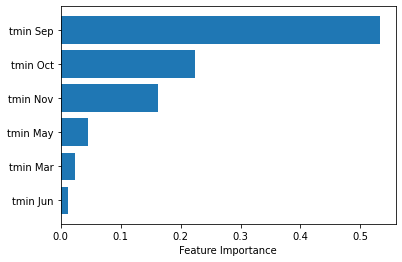

In [ ]:
execute_models(X_banana_madeira,y_banana_madeira)

By analysing the table we can see that the decision tree regression has the best evaluation (which is the lowest MASE). The worst model was linear regression, with the highest MASE. However, overall, our models behaved well with our worst model having an MASE of 19%, which is not bad at all.   

In the feature importance graph only the features that actually had the most importance for the model appear. We can see that the minimum temperatures are great predictors of banana production in Madeira, being the minimum temperatures of September, October and November the features with more importance, in general. 

Linear Regression
LinearRegression
MASE:  0.1519435039615321
RMSE:  0.19840088410306247
------------------------------
Decision tree Regression
Fitting 3 folds for each of 56 candidates, totalling 168 fits
[CV 1/3] END max_depth=1, max_features=auto, splitter=best;, score=-0.215 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, splitter=best;, score=-0.134 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, splitter=best;, score=-0.331 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, splitter=random;, score=-0.222 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, splitter=random;, score=-0.151 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, splitter=random;, score=-0.260 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, splitter=best;, score=-0.109 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, splitter=best;, score=-0.148 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2,

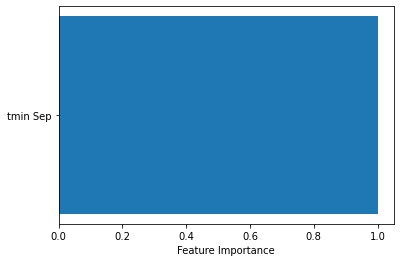

In [ ]:
execute_models(X_laranja_algarve,y_laranja_algarve)

Using the previous results as a comparison, we can see that, in general,we have a higher MASE that the previous product-region combination. But, in this case, Linear regression has the best result whereas the other three are worse. In this case lasso and ridge are again very similar, as they were before.  

In this case, we only got one feature in the feature importance graph, the September minimum temperature. It appears to have an importance of 100%.

Usually, if only one feature appears in the feature importance plot with a relative importance of 100\%, this might indicate that this feature alone is able to predict the target variable well, and that the other features are not needed for this task.
However, this could also be an indication of a problem with the model or the data.

A few possible reasons for this could be:

- The other features in the data set are not informative, they do not have a significant relationship with the target variable, they are not useful in making predictions.
- The model is overfitting to the training data, it's memorizing the data instead of generalizing it, in this case, the model is not generalizing well to unseen data, and the feature importance on the test set will not reflect the true importance of the feature.
- The other features have been pre-processed in a way that has removed their information, or they are highly correlated with the most important feature, they might have been combined or removed from the dataset, which could cause a single feature to have all the importance.




Linear Regression
LinearRegression
MASE:  0.10776421230738617
RMSE:  0.11586226179902115
------------------------------
Decision tree Regression
Fitting 3 folds for each of 56 candidates, totalling 168 fits
[CV 1/3] END max_depth=1, max_features=auto, splitter=best;, score=-0.177 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, splitter=best;, score=-0.218 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, splitter=best;, score=-0.110 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, splitter=random;, score=-0.114 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, splitter=random;, score=-0.115 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, splitter=random;, score=-0.178 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, splitter=best;, score=-0.092 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, splitter=best;, score=-0.086 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2

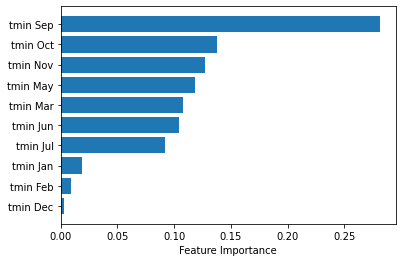

In [ ]:
execute_models(X_uva_norte,y_uva_norte)

This is really the product-region combination where the models perform best (given the low MASE values). The MASE values of the four models are very close. Even so we can see that the model with the lowest MASE was decision tree regression just as it was for the banana production in Madeira. 
We can see that, again, the September minimum temperature has the greatest relative importance, at about 65%. Thus, the September and October minimum temperatures are the ones that contribute most to the grape production prediction. 

Linear Regression
LinearRegression
MASE:  0.3819626387092525
RMSE:  0.45331394060462565
------------------------------
Decision tree Regression
Fitting 3 folds for each of 56 candidates, totalling 168 fits
[CV 1/3] END max_depth=1, max_features=auto, splitter=best;, score=-0.709 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, splitter=best;, score=-0.533 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, splitter=best;, score=-0.792 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, splitter=random;, score=-1.056 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, splitter=random;, score=-1.009 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, splitter=random;, score=-1.785 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, splitter=best;, score=-1.363 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, splitter=best;, score=-0.825 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2,

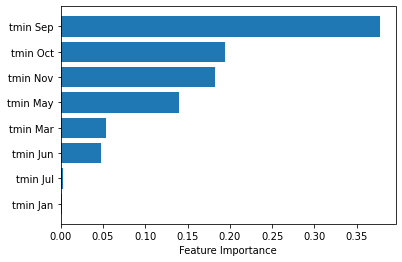

In [ ]:
execute_models(X_azeitona_alentejo,y_azeitona_alentejo)


Of all 4 product-region pairs analyzed this one is, by far, the one which has the worst evaluation at all. However linear regression and decision tree have way better results comparing only these 2, the linear model stands out for its positivity.  


As we saw when we analyzed the feature importance for Banana production in Madeira, here too we only have minimum temperatures as features with more importance, and again the September minimum temperature has the highest relative importance. However, unlike what happened before, although the features with the highest relative importance are again September, October and November, we can see that the remaining minimum temperatures have more contribution to the model than what happened in the case of Banana production in Madeira.

### Apply model for precipitation
[[ go back to the top ]](#Table-of-contents)

Another demonstration of the models chosen is presented in this following section. We predict the precipitation for the most recent year with data, in this case 2018, and then we built a time series with the comparison between the predicted and the original data of that year.

In [ ]:
# Splitting the dataset into the Training set and Test set
X=X_precipitation
y=y_precipitation
X = X.fillna(0)  # original dataset without null values

y = y.fillna(0) # original dataset without null values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=44)  # splitting in training and test set

# Linear Regression
print("Linear Regression")
reg = LinearRegression()  #initialize the model object
reg.fit(X_train,y_train)  #fitting the training data
pred = reg.predict(X_precipitation)  #predict target
print("LinearRegression")
mase = mean_absolute_error(y_precipitation, pred) #check mean absolute error
print('MASE: ',mase)  #check r2 score
print('RMSE: ', np.sqrt(mean_squared_error(y_precipitation, pred)))  #check root mean squared error
print('-'*30) #print a line

result = pd.DataFrame()
original = pd.DataFrame()
result['values']=pred
original['values'] = y_precipitation.values
result['months'] = [4,8,12,2,1,7,6,3,5,11,10]
original['months'] = [4,8,12,2,1,7,6,3,5,11,10]
result ['type'] = 'predictions'
original['type'] = 'original'
result = pd.concat([result,original])
result = result.sort_values(by=['months'])
fig = px.line(result, x='months', y='values', color='type', title='Precipitation Prediction')
fig.show()


Linear Regression
LinearRegression
MASE:  0.09881902152448023
RMSE:  0.25898933175360495
------------------------------


First, we have only used the linear regression model since it was the one with the best results for this particular section, even though we tested others. Then taking a look into the graph, we can see that, in general our model predictions are very similar to the original ones. Also we can verify that summer and autumn are the seasons with most accuracy.

***

Initially, when we defined the products and regions we want to use in our models, we chose not to create a function that would do the same in all four cases. This is because, for example, in the case of the first three selected regions (Madeira, Algarve and Alentejo) the **ipmadata** dataset provides us with information between 1986 and 2018. However, in the case of the North zone, it already varies between 1986 and 2019. These differences make it impossible to define a function that calls all the products we want to select and their respective region. Therefore, we analyse them one by one.  
Since we are dealing with a regression problem and not a classification problem, we cannot present, for instance, the ROC (Receiver Operating Characteristic) curve and the confusion matrix or classification report, since these only apply to classification problems. 

## References

[[ go back to the top ]](#Table-of-contents)

http://api.ipma.pt/open-data/observation/climate/monthly-long-series/
https://www.ine.pt/xportal/xmain?xpid=INE&xpgid=ine_publicacoes&PUBLICACOESpub_boui=129211&PUBLICACOESmodo=2&xlang=pt
https://www.ine.pt/xportal/xmain?xpid=INE&xpgid=ine_indicadores&indOcorrCod=0000020&contexto=bd&selTab=tab2
https://www.ine.pt/xportal/xmain?xpid=INE&xpgid=ine_indicadores&indOcorrCod=0000018&contexto=bd&selTab=tab2
https://www.ine.pt/xportal/xmain?xpid=INE&xpgid=ine_indicadores&indOcorrCod=0008222&contexto=bd&selTab=tab2
https://www.ine.pt/xportal/xmain?xpid=INE&xpgid=ine_publicacoes&PUBLICACOESpub_boui=31589846&PUBLICACOESmodo=2
https://www.ine.pt/xportal/xmain?xpid=INE&xpgid=ine_publicacoes&PUBLICACOESpub_boui=129211&PUBLICACOESmodo=2
https://www.ine.pt/xportal/xmain?xpid=INE&xpgid=ine_publicacoes&PUBLICACOESpub_boui=129211&PUBLICACOESmodo=2
https://www.mygreatlearning.com/blog/mean-square-error-explained/
https://scikit-learn.org/stable/modules/linear_model.html